# **Non-Linear Modeling and Simula,on of Disease Spread**

# **Team Members (Alpabetically)**
#### Ama Asongmaa Aseda Annor
#### Austine Iheji
#### Edward Ofosu Mensah
#### Eric Hantungimana
#### Susanna Agyapong



# **Modules and Libraries**

# Installing the Libraries needed

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\austi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
from scipy.optimize import curve_fit

#Downloading the dataset

In [9]:
# URLs for the time series data from github
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed = pd.read_csv(confirmed_url)
df_deaths = pd.read_csv(deaths_url)
df_recovered = pd.read_csv(recovered_url)

print("Finshed downloading the data")


Finshed downloading the data


#**2.Understanding the Data Set, attributes and their relations**

In [10]:
df_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

In [11]:
df_deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881    6881  
3     165     165     165     165     165     165  
4    1933    1933    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [12]:
df_recovered.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...        0       0       0       0   
1        0        0        0        0  ...        0       0       0       0   
2        0        0        0        0  ...        0       0       0       0   
3        0        0        0        0  ...        0       0       0       0   
4        0        0        0        0  ...        0       0       0       0   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  
2       0       0       0       0       0       0  
3       0       0       0       0       0       0  
4       0       0       0       0       0       0  

[5 rows x 1147 columns]

In [13]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [14]:
# 2. Data Preprocessing Function
def process_covid_data(df_confirmed, df_deaths, df_recovered):
    """
    Process and clean the COVID-19 datasets
    Parameters:
    df_confirmed (DataFrame): Confirmed cases dataframe from what we have downloaded
    df_deaths (DataFrame): Deaths dataframe from what we have downloaded
    df_recovered (DataFrame): Recovered cases dataframe from what we have downloaded

    this will return
    tuple: (Merged dataframe, List of countries)
    """
    # Function to transform data from wide to long format
    def process_df(df, category):
        # Make a copy to avoid modifying the original
        df_copy = df.copy()

        #Identify date columns from column 4
        date_columns = df_copy.columns[4:]

        # Melt the dataframe to convert to long format
        df_long = pd.melt(
            df_copy,
            id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
            value_vars=date_columns,
            var_name='Date',
            value_name=category
        )

        # Convert date strings to datetime objects
        df_long['Date'] = pd.to_datetime(df_long['Date'])

        return df_long

    # Process each dataset
    confirmed_long = process_df(df_confirmed, 'Confirmed')
    deaths_long = process_df(df_deaths, 'Deaths')
    recovered_long = process_df(df_recovered, 'Recovered')

    # Merge the datasets
    covid_merged = confirmed_long.merge(
        deaths_long,
        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
    )
    covid_merged = covid_merged.merge(
        recovered_long,
        on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'],
        how='left'  # Use left join because recovered data is missing
    )

    # Fill missing values
    covid_merged['Province/State'] = covid_merged['Province/State'].fillna('')
    covid_merged['Recovered'] = covid_merged['Recovered'].fillna(0)

    # Get list of available countries
    countries = sorted(covid_merged['Country/Region'].unique())

    print(f"Data processed successfully! Found data for {len(countries)} countries/regions.")
    return covid_merged, countries

In [15]:
covid_merged, countries = process_covid_data(df_confirmed, df_deaths, df_recovered)

C:\Users\austi\AppData\Local\Temp\ipykernel_11096\951785482.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'])
C:\Users\austi\AppData\Local\Temp\ipykernel_11096\951785482.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'])
C:\Users\austi\AppData\Local\Temp\ipykernel_11096\951785482.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'])


Data processed successfully! Found data for 201 countries/regions.


In [16]:
covid_merged

Province/State        Country/Region        Lat        Long       Date  \
0                               Afghanistan  33.939110   67.709953 2020-01-22   
1                                   Albania  41.153300   20.168300 2020-01-22   
2                                   Algeria  28.033900    1.659600 2020-01-22   
3                                   Andorra  42.506300    1.521800 2020-01-22   
4                                    Angola -11.202700   17.873900 2020-01-22   
...               ...                   ...        ...         ...        ...   
330322                   West Bank and Gaza  31.952200   35.233200 2023-03-09   
330323                 Winter Olympics 2022  39.904200  116.407400 2023-03-09   
330324                                Yemen  15.552727   48.516388 2023-03-09   
330325                               Zambia -13.133897   27.849332 2023-03-09   
330326                             Zimbabwe -19.015438   29.154857 2023-03-09   

        Confirmed  Deaths  Recovered  
0               0       0        0.0  
1               0       0        0.0  
2               0       0        0.0  
3               0       0        0.0  
4               0       0        0.0  
...           ...     ...        ...  
330322     703228    5708        0.0  
330323        535       0        0.0  
330324      11945    2159        0.0  
330325     343135    4057        0.0  
330326     264276    5671        0.0  

[330327 rows x 8 columns]

In [17]:
countries[2:10]

['Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia']

In [18]:
#dropping the province/state, lat anD LONG since we won't be using it for future simulations
covid_merged = covid_merged.drop(columns=['Province/State'], axis=1)
covid_merged = covid_merged.drop(columns=['Lat'], axis=1)
covid_merged = covid_merged.drop(columns=['Long'], axis=1)

In [19]:
covid_merged.head()

Country/Region       Date  Confirmed  Deaths  Recovered
0    Afghanistan 2020-01-22          0       0        0.0
1        Albania 2020-01-22          0       0        0.0
2        Algeria 2020-01-22          0       0        0.0
3        Andorra 2020-01-22          0       0        0.0
4         Angola 2020-01-22          0       0        0.0

In [20]:
#we want to get just the data for Nigeria and Ghana in seprate datframes
covid_ng = covid_merged[covid_merged['Country/Region'] == 'Nigeria']
covid_gh = covid_merged[covid_merged['Country/Region'] == 'Ghana']

In [21]:
covid_ng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 206 to 330244
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  1143 non-null   object        
 1   Date            1143 non-null   datetime64[ns]
 2   Confirmed       1143 non-null   int64         
 3   Deaths          1143 non-null   int64         
 4   Recovered       1143 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 53.6+ KB


In [22]:
covid_gh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 136 to 330174
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  1143 non-null   object        
 1   Date            1143 non-null   datetime64[ns]
 2   Confirmed       1143 non-null   int64         
 3   Deaths          1143 non-null   int64         
 4   Recovered       1143 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 53.6+ KB


In [23]:
covid_ng.tail()

Country/Region       Date  Confirmed  Deaths  Recovered
329088        Nigeria 2023-03-05     266598    3155        0.0
329377        Nigeria 2023-03-06     266598    3155        0.0
329666        Nigeria 2023-03-07     266598    3155        0.0
329955        Nigeria 2023-03-08     266598    3155        0.0
330244        Nigeria 2023-03-09     266598    3155        0.0

In [24]:
#we want to print the middle of the dataframe
covid_ng.iloc[100:150]

Country/Region       Date  Confirmed  Deaths  Recovered
29106        Nigeria 2020-05-01       2170      68      351.0
29395        Nigeria 2020-05-02       2388      85      351.0
29684        Nigeria 2020-05-03       2558      87      400.0
29973        Nigeria 2020-05-04       2802      93      417.0
30262        Nigeria 2020-05-05       2950      98      481.0
30551        Nigeria 2020-05-06       3145     103      534.0
30840        Nigeria 2020-05-07       3526     107      601.0
31129        Nigeria 2020-05-08       3912     117      679.0
31418        Nigeria 2020-05-09       4151     128      745.0
31707        Nigeria 2020-05-10       4399     143      778.0
31996        Nigeria 2020-05-11       4641     150      902.0
32285        Nigeria 2020-05-12       4787     158      959.0
32574        Nigeria 2020-05-13       4971     164     1070.0
32863        Nigeria 2020-05-14       5162     167     1180.0
33152        Nigeria 2020-05-15       5450     171     1320.0
33441        Nigeria 2020-05-16       5621     176     1472.0
33730        Nigeria 2020-05-17       5959     182     1594.0
34019        Nigeria 2020-05-18       6175     191     1644.0
34308        Nigeria 2020-05-19       6401     192     1734.0
34597        Nigeria 2020-05-20       6677     200     1840.0
34886        Nigeria 2020-05-21       7016     211     1907.0
35175        Nigeria 2020-05-22       7261     221     2007.0
35464        Nigeria 2020-05-23       7526     221     2174.0
35753        Nigeria 2020-05-24       7839     226     2263.0
36042        Nigeria 2020-05-25       8068     233     2311.0
36331        Nigeria 2020-05-26       8344     249     2385.0
36620        Nigeria 2020-05-27       8733     254     2501.0
36909        Nigeria 2020-05-28       8915     259     2592.0
37198        Nigeria 2020-05-29       9302     261     2697.0
37487        Nigeria 2020-05-30       9855     273     2856.0
37776        Nigeria 2020-05-31      10162     287     3007.0
38065        Nigeria 2020-06-01      10578     299     3122.0
38354        Nigeria 2020-06-02      10819     314     3240.0
38643        Nigeria 2020-06-03      11166     315     3329.0
38932        Nigeria 2020-06-04      11516     323     3535.0
39221        Nigeria 2020-06-05      11844     333     3696.0
39510        Nigeria 2020-06-06      12233     342     3826.0
39799        Nigeria 2020-06-07      12486     354     3959.0
40088        Nigeria 2020-06-08      12801     361     4040.0
40377        Nigeria 2020-06-09      13464     365     4206.0
40666        Nigeria 2020-06-10      13873     382     4351.0
40955        Nigeria 2020-06-11      14554     387     4494.0
41244        Nigeria 2020-06-12      15181     399     4891.0
41533        Nigeria 2020-06-13      15682     407     5101.0
41822        Nigeria 2020-06-14      16085     420     5220.0
42111        Nigeria 2020-06-15      16658     424     5349.0
42400        Nigeria 2020-06-16      17148     455     5623.0
42689        Nigeria 2020-06-17      17735     469     5967.0
42978        Nigeria 2020-06-18      18480     475     6307.0
43267        Nigeria 2020-06-19      19147     487     6581.0

In [25]:
covid_gh.tail()

Country/Region       Date  Confirmed  Deaths  Recovered
329018          Ghana 2023-03-05     171209    1462        0.0
329307          Ghana 2023-03-06     171209    1462        0.0
329596          Ghana 2023-03-07     171229    1462        0.0
329885          Ghana 2023-03-08     171229    1462        0.0
330174          Ghana 2023-03-09     171229    1462        0.0

# Plotting line graphs for better visualization

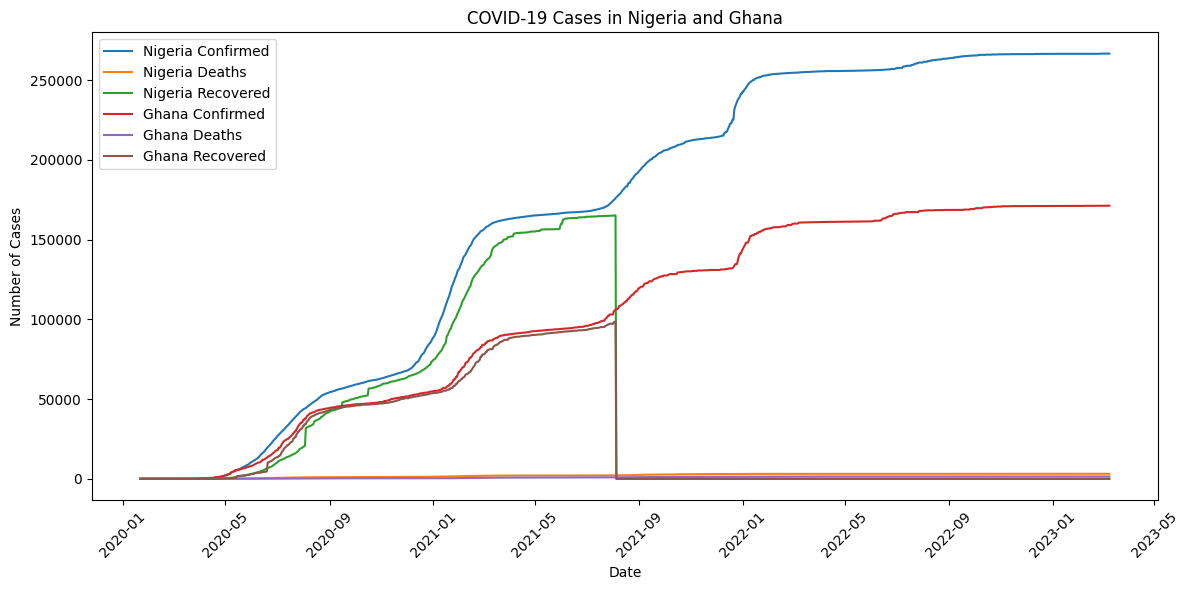

In [26]:

plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Confirmed'], label='Nigeria Confirmed')
plt.plot(covid_ng['Date'], covid_ng['Deaths'], label='Nigeria Deaths')
plt.plot(covid_ng['Date'], covid_ng['Recovered'], label='Nigeria Recovered')

plt.plot(covid_gh['Date'], covid_gh['Confirmed'], label='Ghana Confirmed')
plt.plot(covid_gh['Date'], covid_gh['Deaths'], label='Ghana Deaths')
plt.plot(covid_gh['Date'], covid_gh['Recovered'], label='Ghana Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


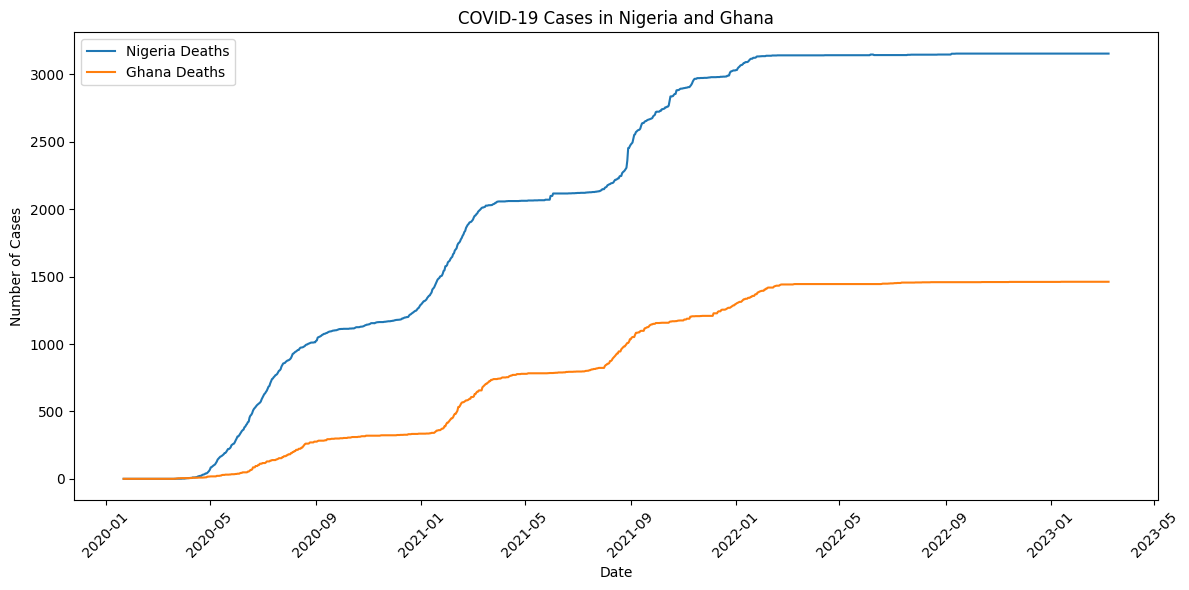

In [27]:
# Create the line graph for the deaths graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Deaths'], label='Nigeria Deaths')

plt.plot(covid_gh['Date'], covid_gh['Deaths'], label='Ghana Deaths')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


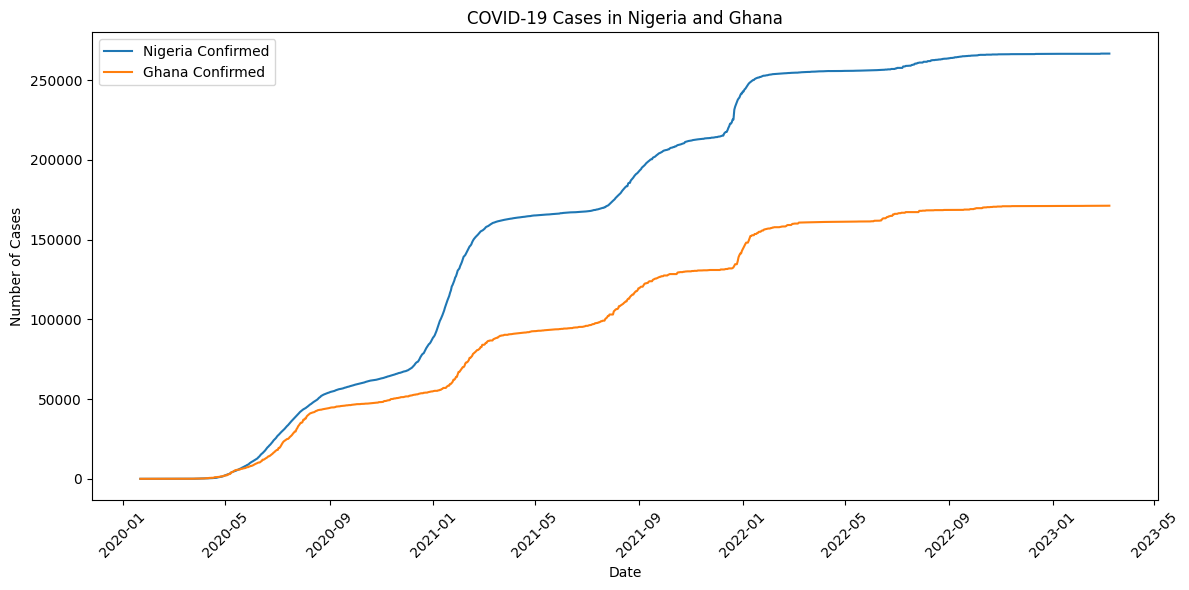

In [28]:
# Create the line graph for the confirmed cases graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Confirmed'], label='Nigeria Confirmed')

plt.plot(covid_gh['Date'], covid_gh['Confirmed'], label='Ghana Confirmed')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


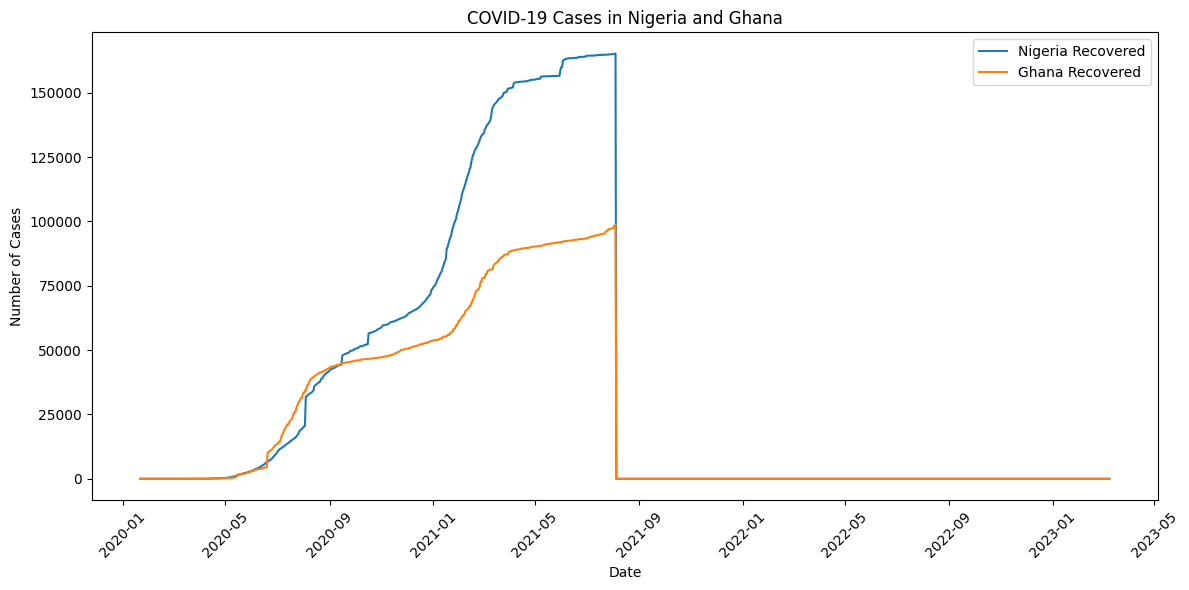

In [29]:
# Create the line graph for the recovered cases graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Recovered'], label='Nigeria Recovered')

plt.plot(covid_gh['Date'], covid_gh['Recovered'], label='Ghana Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**As we can see from the dataset, there is an error with the recovered values, they dropped to zero after 8th April, 2021, and that's wrong. As this is a time series date, it should either remain constant or increase(more appropriate)**

# Fixing the Issue with the Recovered Values after 8th April 2021

**We are going to fix the issue with the recovered cases by first calculating the rate of recovery in the previous years and use that with an increment per 3 months t estimate the new value for recovered cases**

In [30]:
# Function to estimate recovered cases using historical recovery rates with progressive improvement
def estimate_progressive_recovery(covid_merged, improvement_rate=0.05, improvement_period_months=3):
    """
    Estimate recovered cases using historical recovery rates before the cutoff date,
    with gradual improvement over time to account for vaccines and treatments.

    Parameters:
    covid_merged (DataFrame): Merged COVID-19 dataframe
    improvement_rate (float): Rate of improvement in recovery rates every improvement_period_months
    improvement_period_months (int): Number of months between recovery rate improvements

    Returns:
    DataFrame: COVID-19 dataframe with estimated recovered data
    """
    # Make a copy to avoid modifying the original dataframe
    fixed_df = covid_merged.copy()

    # Convert the cutoff date to datetime
    cutoff_date = pd.to_datetime('2021-04-08')

    # Group by country to process each country separately
    countries = fixed_df['Country/Region'].unique()

    recovery_cnt = 0
    country_stats = []

    for country in countries:
        # Get data for this country
        country_mask = fixed_df['Country/Region'] == country
        country_data = fixed_df[country_mask].copy().sort_values('Date')

        # Find dates after the cutoff where recovered is zero
        date_mask = (country_data['Date'] > cutoff_date) & (country_data['Recovered'] == 0)
        dates_to_fix = country_data[date_mask]['Date'].unique()

        if len(dates_to_fix) == 0:
            continue

        recovery_cnt += len(dates_to_fix)

        # Calculate historical recovery rate
        pre_cutoff_data = country_data[country_data['Date'] < cutoff_date]

        # Skip if we don't have enough pre-cutoff data
        if len(pre_cutoff_data) < 30:  # Require at least a month of data
            continue

        # Calculate average recovery percentage in the month before cutoff
        one_month_before = cutoff_date - pd.Timedelta(days=30)
        recent_data = pre_cutoff_data[pre_cutoff_data['Date'] >= one_month_before]

        if len(recent_data) == 0:
            continue

        # Calculate recovery rate as: Recovered / (Confirmed - Deaths)
        recent_data['Recovery_Rate'] = recent_data['Recovered'] / (
            recent_data['Confirmed'] - recent_data['Deaths']
        )

        # Remove outliers and invalid rates
        recent_data = recent_data[(recent_data['Recovery_Rate'] >= 0) & (recent_data['Recovery_Rate'] <= 1)]

        if len(recent_data) == 0:
            continue

        # Get the mean recovery rate (excluding outliers)
        base_recovery_rate = recent_data['Recovery_Rate'].mean()

        # Store the base recovery rate for this country
        country_stats.append({
            'Country': country,
            'Base_Recovery_Rate': base_recovery_rate,
            'Pre_Cutoff_Data_Points': len(pre_cutoff_data),
            'Recent_Data_Points': len(recent_data)
        })

        if not pd.isna(base_recovery_rate) and base_recovery_rate > 0:
            for current_date in dates_to_fix:
                # Calculate months since cutoff
                months_since_cutoff = (current_date - cutoff_date).days / 30.0

                # Calculate improvement factor based on months since cutoff
                improvement_factor = 1.0 + improvement_rate * (months_since_cutoff / improvement_period_months)

                # Ensure improvement factor doesn't make recovery rate exceed 1.0
                max_improvement = min(1.0 / base_recovery_rate, 1.5)  # Cap at 100% recovery or 50% improvement
                improvement_factor = min(improvement_factor, max_improvement)

                # Calculate progressive recovery rate
                progressive_recovery_rate = base_recovery_rate * improvement_factor

                # Ensure recovery rate doesn't exceed 1.0 (100%)
                progressive_recovery_rate = min(progressive_recovery_rate, 0.80)

                # Get current confirmed and deaths
                current_row = country_data[country_data['Date'] == current_date]
                if len(current_row) == 0:
                    continue

                current_confirmed = current_row['Confirmed'].values[0]
                current_deaths = current_row['Deaths'].values[0]

                # Calculate estimated recoveries
                estimated_recovered = progressive_recovery_rate * (current_confirmed - current_deaths)

                # Ensure it's not negative
                estimated_recovered = max(0, estimated_recovered)

                # Update the dataframe
                update_mask = (fixed_df['Country/Region'] == country) & (fixed_df['Date'] == current_date)
                fixed_df.loc[update_mask, 'Recovered'] = estimated_recovered

    print(f"Estimated recovered data for {recovery_cnt} country-date combinations after April 8, 2021")

    # Ensure no negative values and all values are reasonable
    fixed_df.loc[fixed_df['Recovered'] < 0, 'Recovered'] = 0
    invalid_mask = fixed_df['Recovered'] > fixed_df['Confirmed']
    fixed_df.loc[invalid_mask, 'Recovered'] = fixed_df.loc[invalid_mask, 'Confirmed'] - fixed_df.loc[invalid_mask, 'Deaths']

    return fixed_df


In [31]:
#covid_fixed = estimate_progressive_recovery(covid_merged)

In [32]:
#downloading the covid_fixed as csv
#covid_fixed.to_csv('covid_data_fixed.csv', index=False)

In [33]:
#downloading the csv file
#from google.colab import files
#files.download('covid_data_fixed.csv')

**Due to intensive nature if computation to clean the data, we downloaded the data for future use**

In [34]:
covid_fixed = pd.read_csv("covid_fixed.csv",low_memory=False)

In [35]:

covid_fixed.tail()

Country/Region        Date  Confirmed  Deaths      Recovered
330322    West Bank and Gaza  2023-03-09     703228    5708  558016.000000
330323  Winter Olympics 2022  2023-03-09        535       0       0.000000
330324                 Yemen  2023-03-09      11945    2159    7772.924764
330325                Zambia  2023-03-09     343135    4057  271262.400000
330326              Zimbabwe  2023-03-09     264276    5671  206884.000000

In [36]:
# once the file is csv file, everything becomes a string
# so we want Date column converted to standard format
covid_fixed['Date'] = pd.to_datetime(covid_fixed['Date'])


In [37]:
#we want to get just the fixed data for Nigeria and Ghana in seprate dataframes
covid_ng = covid_fixed[covid_fixed['Country/Region'] == 'Nigeria']
covid_gh = covid_fixed[covid_fixed['Country/Region'] == 'Ghana']

In [38]:
covid_ng.tail()

Country/Region       Date  Confirmed  Deaths  Recovered
329088        Nigeria 2023-03-05     266598    3155   210754.4
329377        Nigeria 2023-03-06     266598    3155   210754.4
329666        Nigeria 2023-03-07     266598    3155   210754.4
329955        Nigeria 2023-03-08     266598    3155   210754.4
330244        Nigeria 2023-03-09     266598    3155   210754.4

In [39]:
covid_gh.tail()

Country/Region       Date  Confirmed  Deaths  Recovered
329018          Ghana 2023-03-05     171209    1462   135797.6
329307          Ghana 2023-03-06     171209    1462   135797.6
329596          Ghana 2023-03-07     171229    1462   135813.6
329885          Ghana 2023-03-08     171229    1462   135813.6
330174          Ghana 2023-03-09     171229    1462   135813.6

#Plotting the graphs again

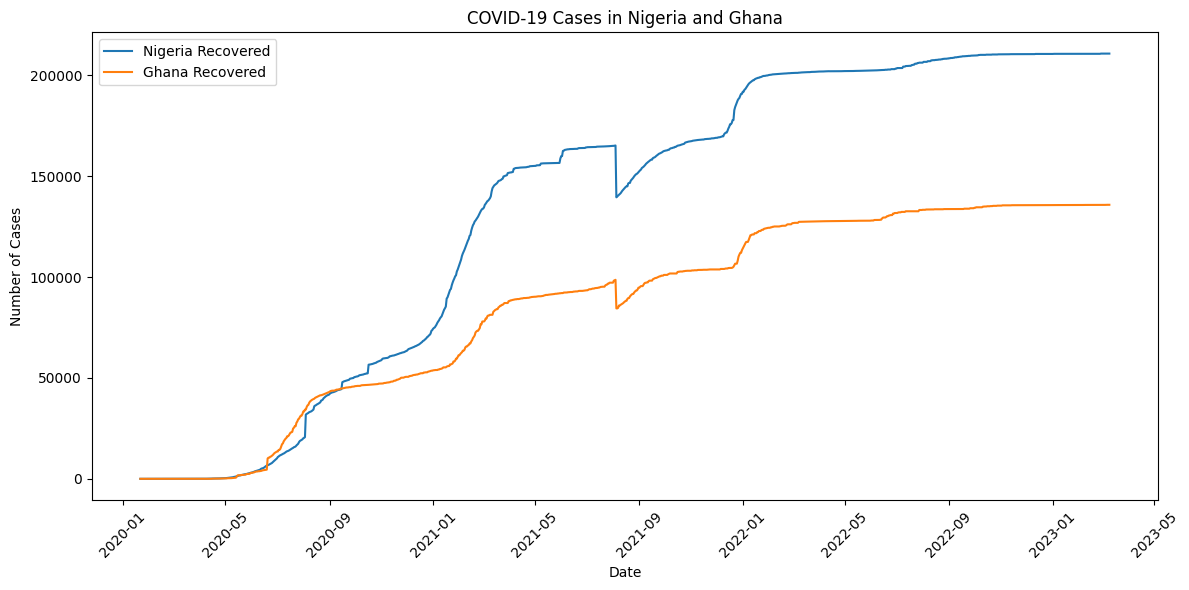

In [40]:
# Create the line graph for the recovered cases graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Recovered'], label='Nigeria Recovered')

plt.plot(covid_gh['Date'], covid_gh['Recovered'], label='Ghana Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


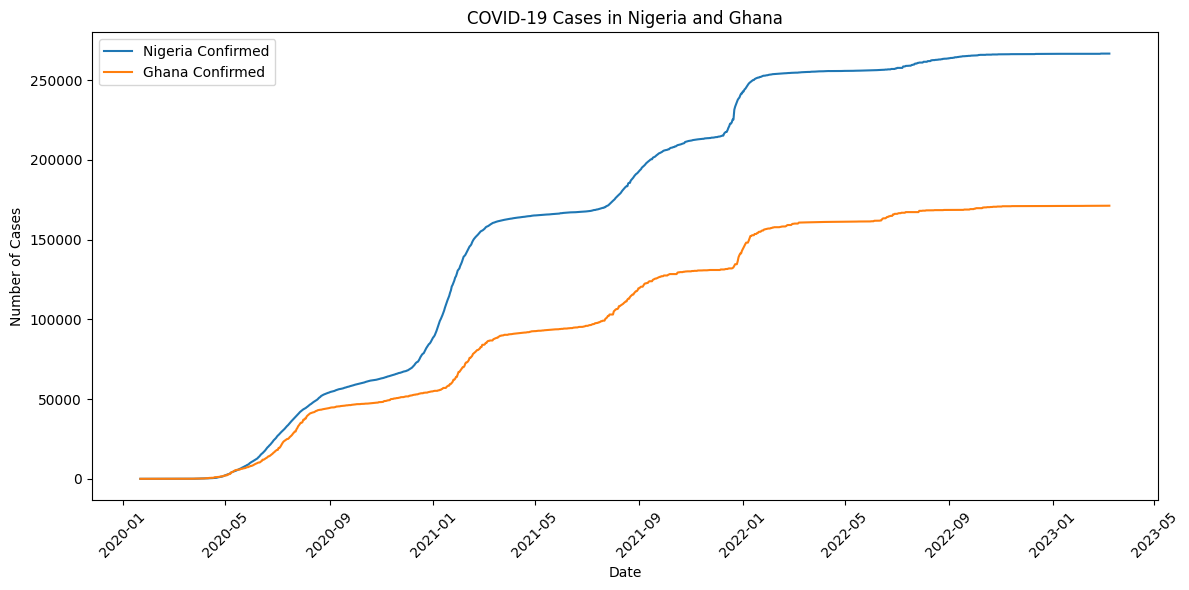

In [41]:
# Create the line graph for the confirmed cases graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Confirmed'], label='Nigeria Confirmed')

plt.plot(covid_gh['Date'], covid_gh['Confirmed'], label='Ghana Confirmed')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


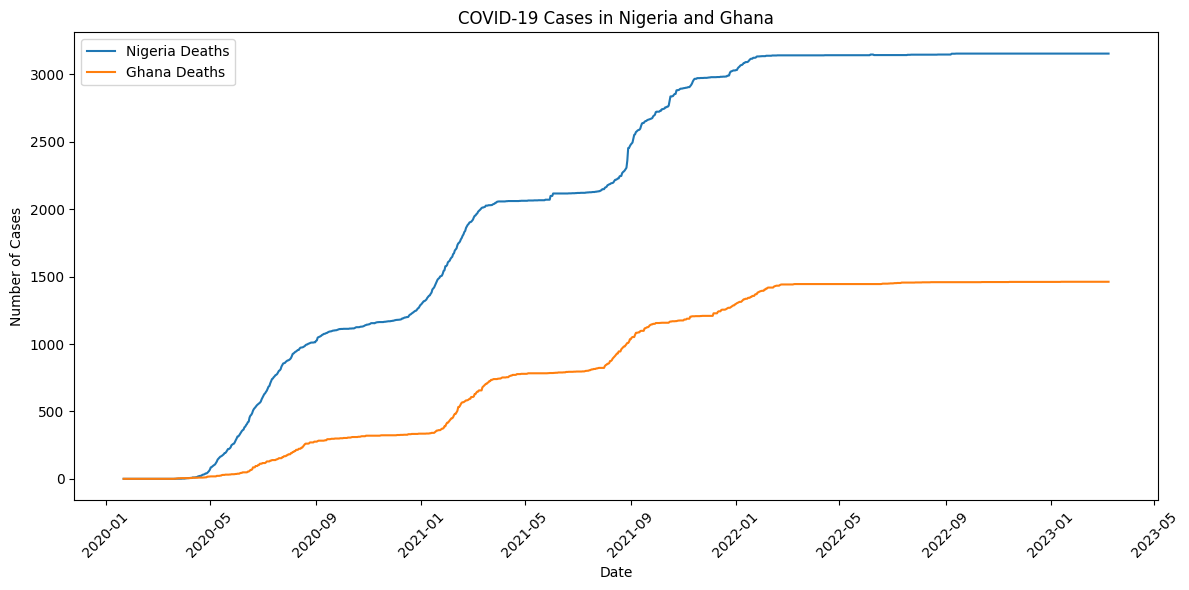

In [42]:
# Create the line graph for the deaths graph
plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Deaths'], label='Nigeria Deaths')

plt.plot(covid_gh['Date'], covid_gh['Deaths'], label='Ghana Deaths')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


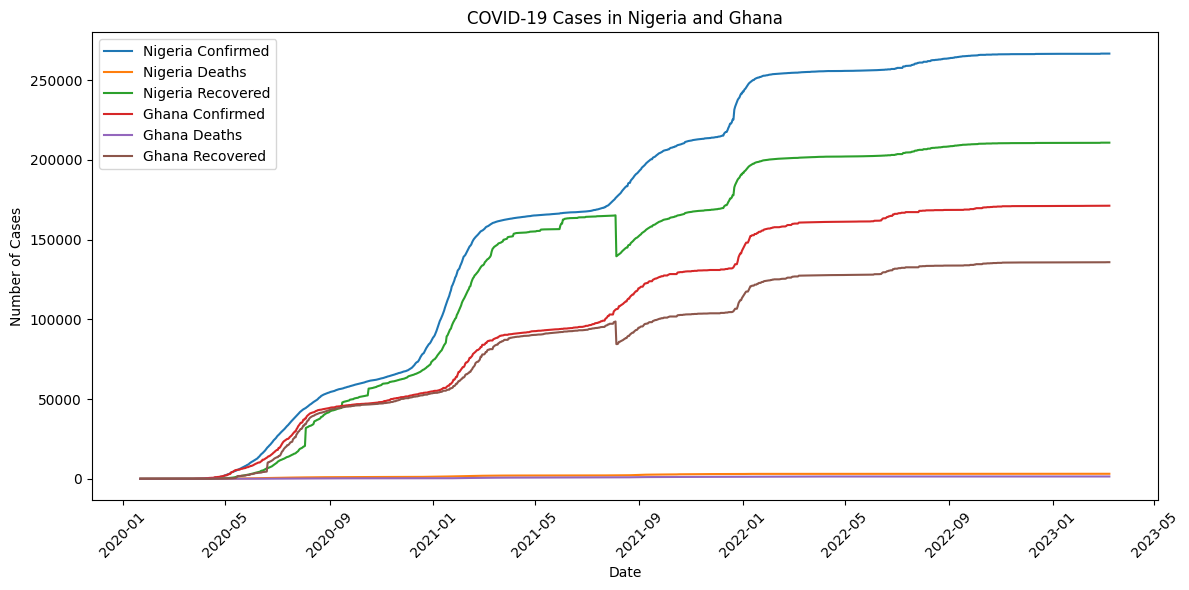

In [43]:

plt.figure(figsize=(12, 6))

plt.plot(covid_ng['Date'], covid_ng['Confirmed'], label='Nigeria Confirmed')
plt.plot(covid_ng['Date'], covid_ng['Deaths'], label='Nigeria Deaths')
plt.plot(covid_ng['Date'], covid_ng['Recovered'], label='Nigeria Recovered')

plt.plot(covid_gh['Date'], covid_gh['Confirmed'], label='Ghana Confirmed')
plt.plot(covid_gh['Date'], covid_gh['Deaths'], label='Ghana Deaths')
plt.plot(covid_gh['Date'], covid_gh['Recovered'], label='Ghana Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Nigeria and Ghana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **EDA analysis**

**Since our dataset has been cleaned and we have fixed the issue with the recovered values, we perform EDA on global trends**

In [44]:
global_trend = covid_fixed.groupby('Date')[['Confirmed', 'Deaths', 'Recovered' ]].sum().reset_index()

# Calculate active cases
global_trend['Active'] = global_trend['Confirmed'] - (global_trend['Deaths'] + global_trend['Recovered'])

# Calculate daily new cases
global_trend['New_Confirmed'] = global_trend['Confirmed'].diff().fillna(0)
global_trend['New_Deaths'] = global_trend['Deaths'].diff().fillna(0)
global_trend['New_Recovered'] = global_trend['Recovered'].diff().fillna(0)

# Calculate 7-day moving averages
global_trend['New_Confirmed_MA7'] = global_trend['New_Confirmed'].rolling(window=7).mean()
global_trend['New_Deaths_MA7'] = global_trend['New_Deaths'].rolling(window=7).mean()

# Calculate Case Fatality Rate
global_trend['CFR'] = (global_trend['Deaths'] / global_trend['Confirmed']) * 100

In [45]:
print("Global COVID-19 statistics:")
print(f"Total confirmed cases: {global_trend['Confirmed'].iloc[-1]:,.0f}")
print(f"Total deaths: {global_trend['Deaths'].iloc[-1]:,.0f}")
print(f"Total recovered: {global_trend['Recovered'].iloc[-1]:,.0f}")
print(f"Current active cases: {global_trend['Active'].iloc[-1]:,.0f}")
print(f"Current case fatality rate: {global_trend['CFR'].iloc[-1]:.2f}%")

Global COVID-19 statistics:
Total confirmed cases: 676,570,149
Total deaths: 6,881,802
Total recovered: 352,630,955
Current active cases: 317,057,392
Current case fatality rate: 1.02%


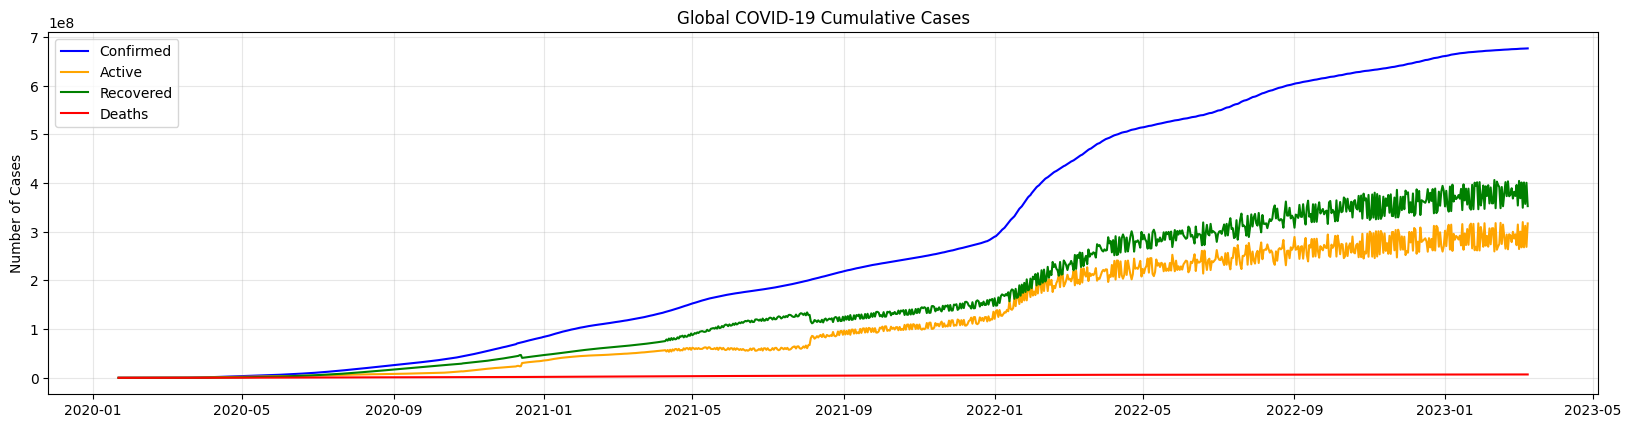

In [46]:
# Plotting
fig = plt.figure(figsize=(20, 16))

# Plot 1: Cumulative Global Cases
ax1 = plt.subplot(3, 1, 1)
ax1.plot(global_trend['Date'], global_trend['Confirmed'], label='Confirmed', color='blue')
ax1.plot(global_trend['Date'], global_trend['Active'], label='Active', color='orange')
ax1.plot(global_trend['Date'], global_trend['Recovered'], label='Recovered', color='green')
ax1.plot(global_trend['Date'], global_trend['Deaths'], label='Deaths', color='red')
ax1.set_title('Global COVID-19 Cumulative Cases')
ax1.set_ylabel('Number of Cases')
ax1.legend()
ax1.grid(True, alpha=0.3)

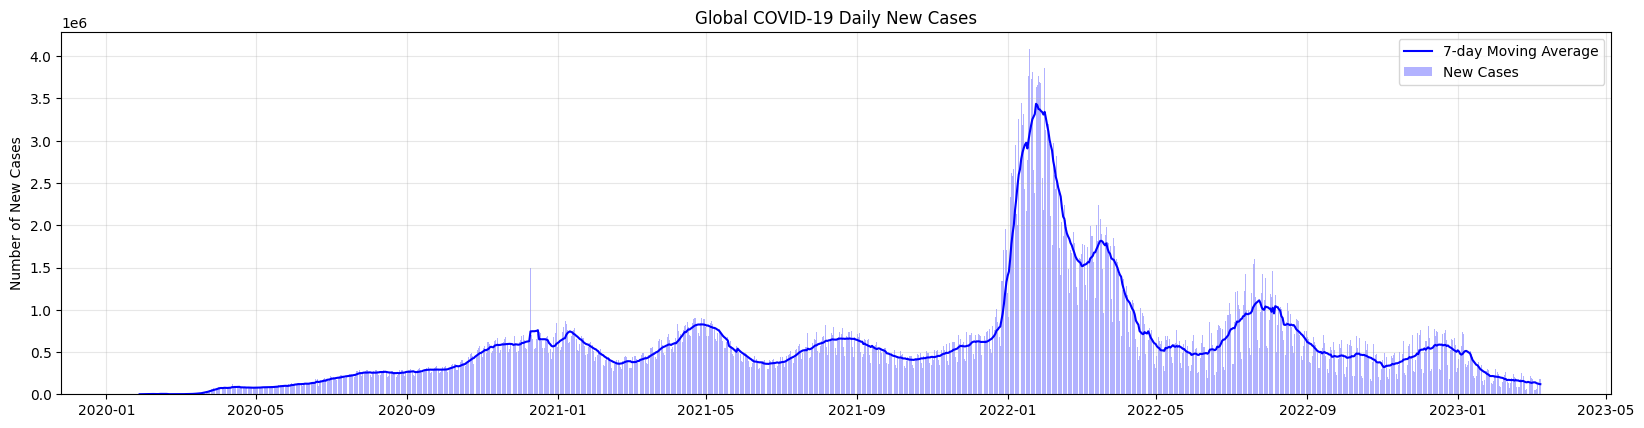

In [47]:

# Plot 2: Daily New Cases
fig = plt.figure(figsize=(20, 16))
ax2 = plt.subplot(3, 1, 2)
ax2.bar(global_trend['Date'], global_trend['New_Confirmed'], label='New Cases', color='blue', alpha=0.3)
ax2.plot(global_trend['Date'], global_trend['New_Confirmed_MA7'], label='7-day Moving Average', color='blue')
ax2.set_title('Global COVID-19 Daily New Cases')
ax2.set_ylabel('Number of New Cases')
ax2.legend()
ax2.grid(True, alpha=0.3)



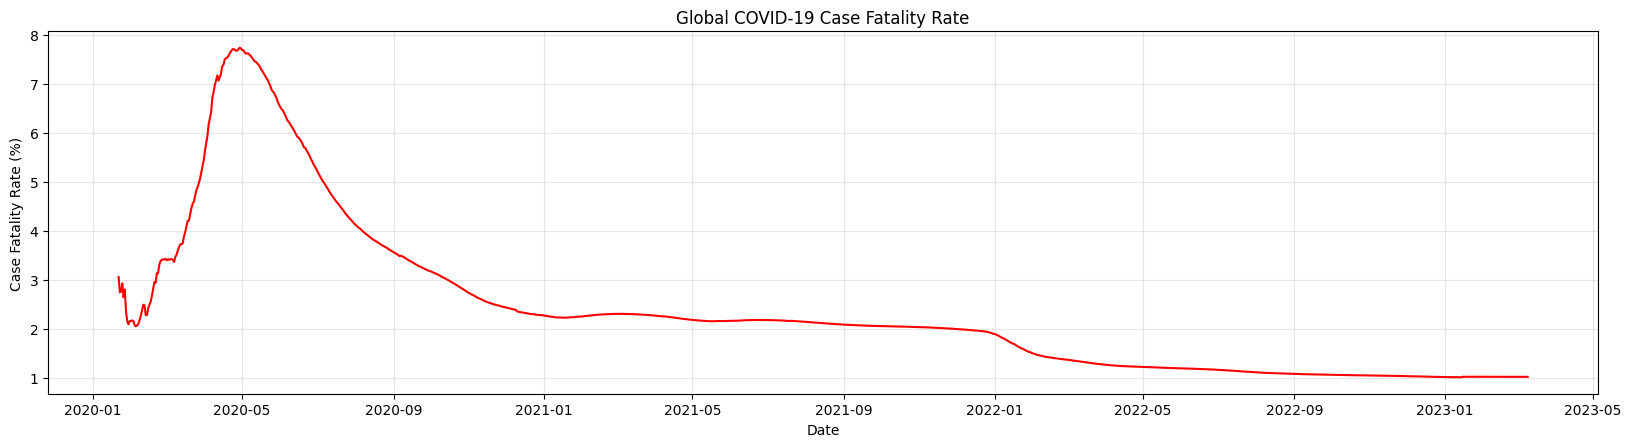

In [48]:
# Plot 3: Case Fatality Rate
fig = plt.figure(figsize=(20, 16))
ax3 = plt.subplot(3, 1, 3)
ax3.plot(global_trend['Date'], global_trend['CFR'], color='red')
ax3.set_title('Global COVID-19 Case Fatality Rate')
ax3.set_xlabel('Date')
ax3.set_ylabel('Case Fatality Rate (%)')
ax3.grid(True, alpha=0.3)


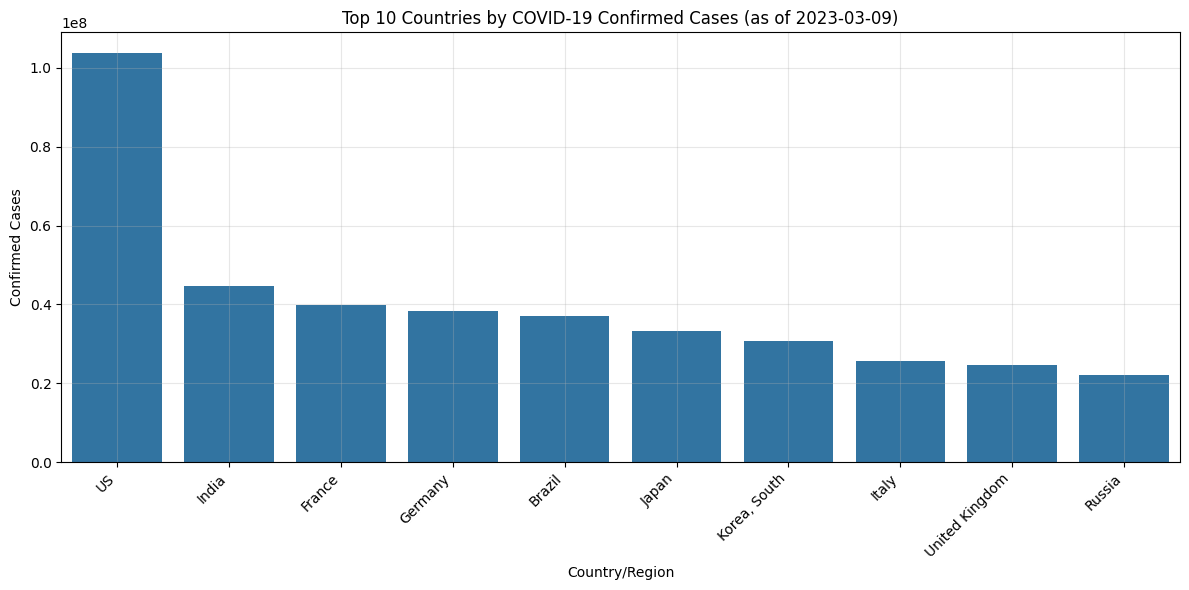

In [49]:
# Show top 10 countries with highest confirmed cases
latest_date = covid_fixed['Date'].max()
latest_data = covid_fixed[covid_fixed['Date'] == latest_date]

top10_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_countries.index, y=top10_countries.values)
plt.title(f'Top 10 Countries by COVID-19 Confirmed Cases (as of {latest_date.strftime("%Y-%m-%d")})')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Confirmed Cases')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
# Calculate daily growth rate
global_trend['Growth_Rate'] = global_trend['New_Confirmed'] / global_trend['Confirmed'].shift(1) * 100

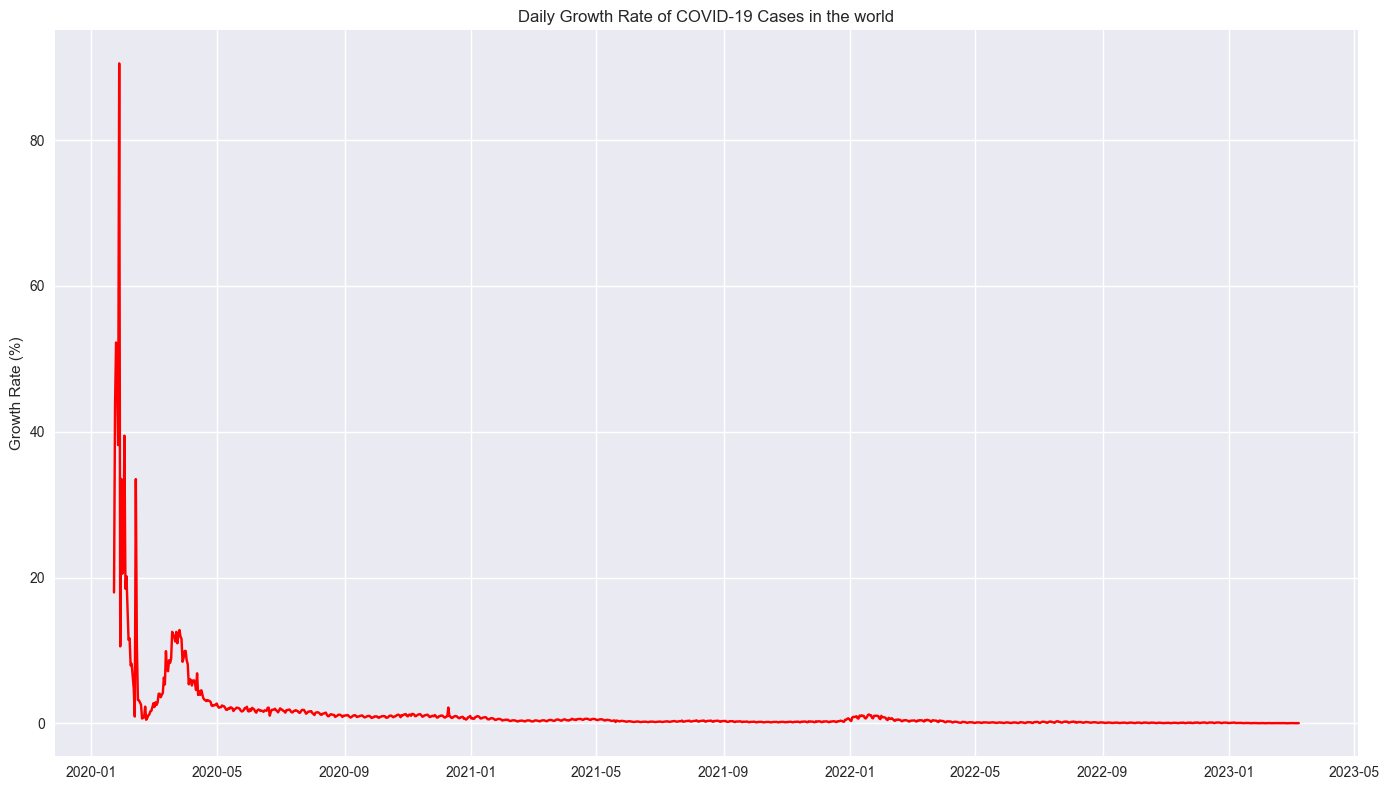

In [51]:
# Plot growth rate
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
axes.plot(global_trend['Date'], global_trend['Growth_Rate'], 'r-')
axes.set_title(f'Daily Growth Rate of COVID-19 Cases in the world')
axes.set_ylabel('Growth Rate (%)')
axes.grid(True)

plt.tight_layout()
plt.show()

# **Logistic Growth Model**

In [52]:
def fit_logistic_model(country_data, days_to_predict=30):
    """
    Fits a logistic growth model to COVID-19 data and makes predictions

    Parameters:
    country_data (DataFrame): Processed data for a country
    days_to_predict (int): Number of days to predict into the future

    Returns:
    tuple: (fitted parameters, predicted data, evaluation metrics)
    """
    # Extract data arrays
    confirmed = country_data['Confirmed'].values
    dates = country_data['Date'].values

    # Initial time points (days from start)
    t = np.arange(len(confirmed))

    # Define logistic function
    def logistic_function(t, L, k, t0):
        """
        Logistic function with parameters:
        L: final size (carrying capacity)
        k: growth rate
        t0: midpoint of the curve (inflection point)
        """
        return L / (1 + np.exp(-k * (t - t0)))

    # Fit the logistic function to the data
    try:
        # Initial parameter guess
        p0 = [max(confirmed) * 2, 0.1, len(confirmed) / 2]

        # Fit the model
        params, covariance = curve_fit(
            logistic_function,
            t,
            confirmed,
            p0=p0,
            bounds=([0, 0, 0], [np.inf, 1, np.inf])
        )

        # Extract parameters
        L, k, t0 = params

        print(f"\nLogistic Model Parameters:")
        print(f"Carrying capacity (L): {L:,.0f}")
        print(f"Growth rate (k): {k:.6f}")
        print(f"Inflection point (t0): Day {t0:.1f}")

        # Create extended time range for predictions
        t_extended = np.arange(len(confirmed) + days_to_predict)

        # Create extended dates
        if isinstance(dates[0], np.datetime64):
            dates = [pd.Timestamp(d).to_pydatetime() for d in dates]

        last_date = dates[-1]
        future_dates = [last_date + timedelta(days=i+1) for i in range(days_to_predict)]
        extended_dates = np.array(dates + future_dates)

        # Generate predictions
        predictions = logistic_function(t_extended, L, k, t0)

        # Get predictions only for historical data (for model evaluation)
        historical_predictions = predictions[:len(confirmed)]

        # Calculate evaluation metrics
        metrics = calculate_model_metrics(confirmed, historical_predictions)

        # Print evaluation metrics
        print("\nModel Evaluation Metrics:")
        print(f"R² Score: {metrics['r2']:.4f}")
        print(f"MSE: {metrics['mse']:.2f}")
        print(f"RMSE: {metrics['rmse']:.2f}")
        print(f"MAE: {metrics['mae']:.2f}")

        # Calculate daily new cases
        daily_new = np.zeros_like(predictions)
        daily_new[1:] = np.diff(predictions)

        # Calculate doubling time
        doubling_time = np.log(2) / k

        # Calculate when 95% of capacity is reached
        days_to_95percent = (np.log(19) + k * t0) / k  # solving logistic equation for y = 0.95*L

        # Plot results
        plt.figure(figsize=(10, 6))

        # Historical and predicted data
        plt.scatter(dates, confirmed, label='Actual Confirmed Cases', color='blue', alpha=0.6, s=20)
        plt.plot(extended_dates, predictions, label=f'Logistic Model Predictions (R² = {metrics["r2"]:.4f})', color='red')

        # Add vertical line to separate historical data from predictions
        plt.axvline(x=dates[-1], color='black', linestyle='--', alpha=0.5)
        plt.text(dates[-1] + timedelta(days=2), max(confirmed)/2, 'Predictions →', fontsize=12)

        # Add horizontal line at carrying capacity
        plt.axhline(y=L, color='green', linestyle='--', alpha=0.5)
        plt.text(dates[0] + timedelta(days=5), L * 1.02, f'Carrying Capacity: {L:,.0f}', fontsize=12)

        plt.title('Logistic Growth Model Fit and Predictions', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Cumulative Cases', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Plot daily new cases
        plt.figure(figsize=(10, 6))

        # Calculate actual daily new cases
        actual_daily = np.zeros_like(confirmed)
        actual_daily[1:] = np.diff(confirmed)

        plt.bar(dates, actual_daily, alpha=0.6, label='Actual Daily New Cases', color='blue')
        plt.plot(extended_dates, daily_new, label='Predicted Daily New Cases', color='red')

        plt.axvline(x=dates[-1], color='black', linestyle='--', alpha=0.5)
        plt.axvline(x=extended_dates[int(t0)], color='green', linestyle='--', alpha=0.5)
        plt.text(extended_dates[int(t0)] + timedelta(days=2), max(daily_new)/2, 'Inflection Point', fontsize=12)

        plt.title('Daily New Cases - Actual vs Logistic Model Prediction', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Daily New Cases', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Package results
        fitted_params = {
            'L': L,  # carrying capacity
            'k': k,  # growth rate
            't0': t0,  # inflection point
            'doubling_time': doubling_time,
            'days_to_95percent': days_to_95percent
        }

        model_predictions = {
            'cumulative': predictions,
            'daily_new': daily_new,
            't': t_extended,
            'dates': extended_dates
        }

        # Print additional metrics
        print(f"Doubling time: {doubling_time:.2f} days")
        if days_to_95percent > t[-1]:
            days_to_95 = days_to_95percent - t[-1]
            print(f"Days until 95% of capacity reached: {days_to_95:.1f} days from last data point")
            date_95 = last_date + timedelta(days=int(days_to_95))
            print(f"Estimated date at 95% capacity: {date_95.strftime('%Y-%m-%d')}")
        else:
            print("95% of capacity has already been reached according to the model")

        return fitted_params, model_predictions, metrics

    except RuntimeError as e:
        print(f"Error fitting logistic model: {e}")
        print("Try providing more data or adjust initial parameter guesses")
        return None, None, None

In [53]:
def calculate_model_metrics(y_true, y_pred):
    """
    Calculate various evaluation metrics for model performance

    Parameters:
    y_true (array): Actual observed values
    y_pred (array): Model predictions

    Returns:
    dict: Dictionary containing various evaluation metrics
    """
    # Calculate metrics
    # R2 (coefficient of determination)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total) if ss_total != 0 else 0

    # Mean Squared Error
    mse = np.mean((y_true - y_pred)**2)

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Mean Absolute Error
    mae = np.mean(np.abs(y_true - y_pred))


    # Return all metrics as a dictionary
    return {
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae
    }


Logistic Model Parameters:
Carrying capacity (L): 266,054
Growth rate (k): 0.007539
Inflection point (t0): Day 423.9

Model Evaluation Metrics:
R² Score: 0.9845
MSE: 145221940.01
RMSE: 12050.81
MAE: 9169.66


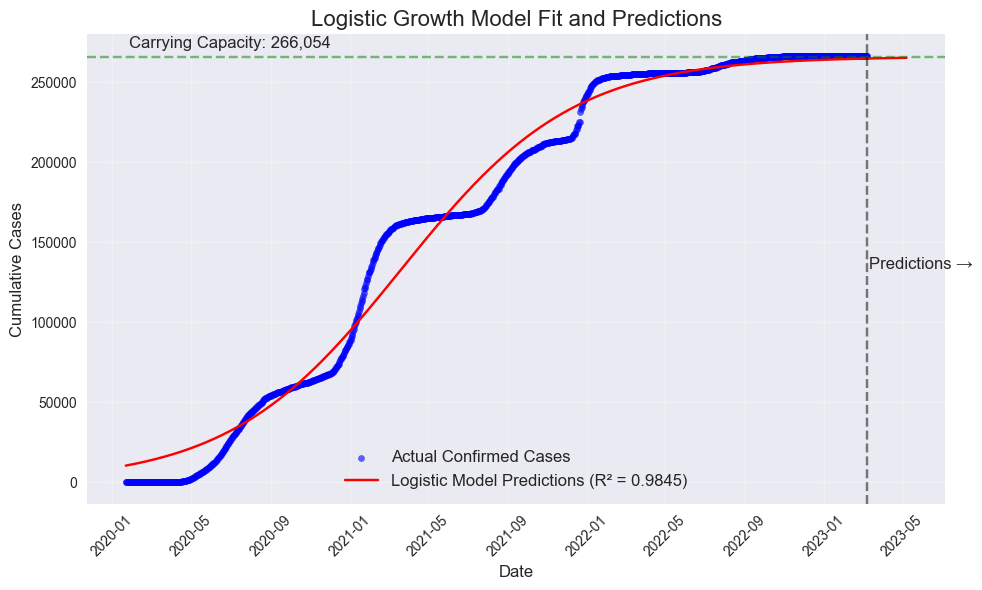

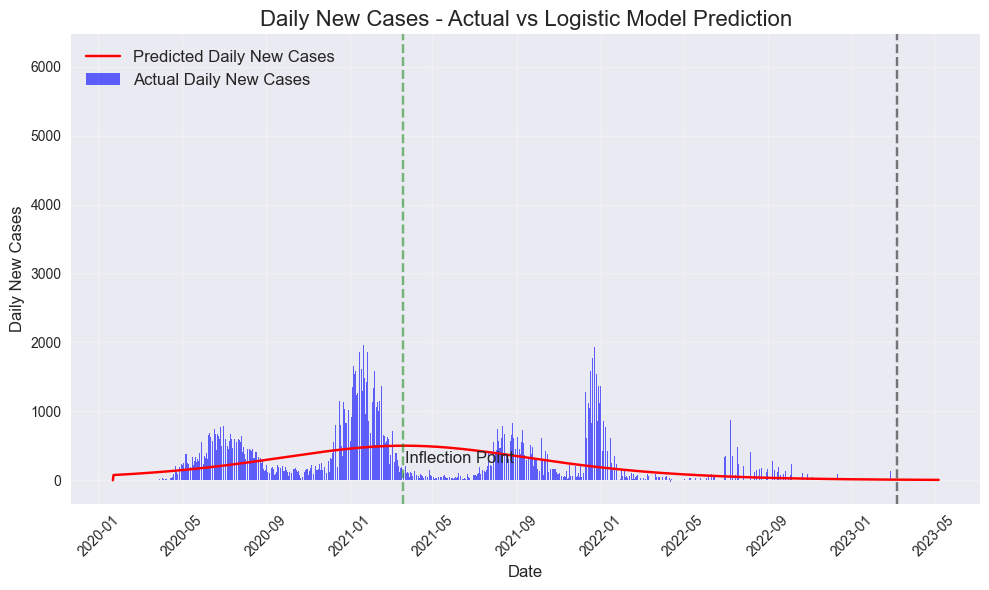

Doubling time: 91.94 days
95% of capacity has already been reached according to the model


In [54]:
# Fit logistic model and get predictions for Nigeria
logistic_params, logistic_predictions, metrics = fit_logistic_model(covid_ng, days_to_predict=60)


Logistic Model Parameters:
Carrying capacity (L): 175,314
Growth rate (k): 0.006302
Inflection point (t0): Day 459.8

Model Evaluation Metrics:
R² Score: 0.9866
MSE: 48508488.03
RMSE: 6964.80
MAE: 5334.97


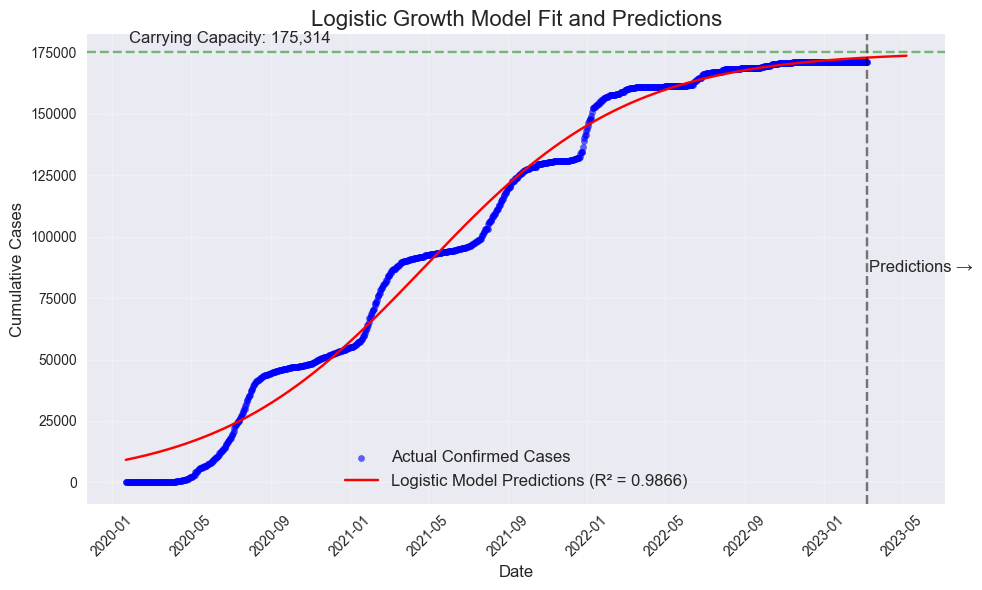

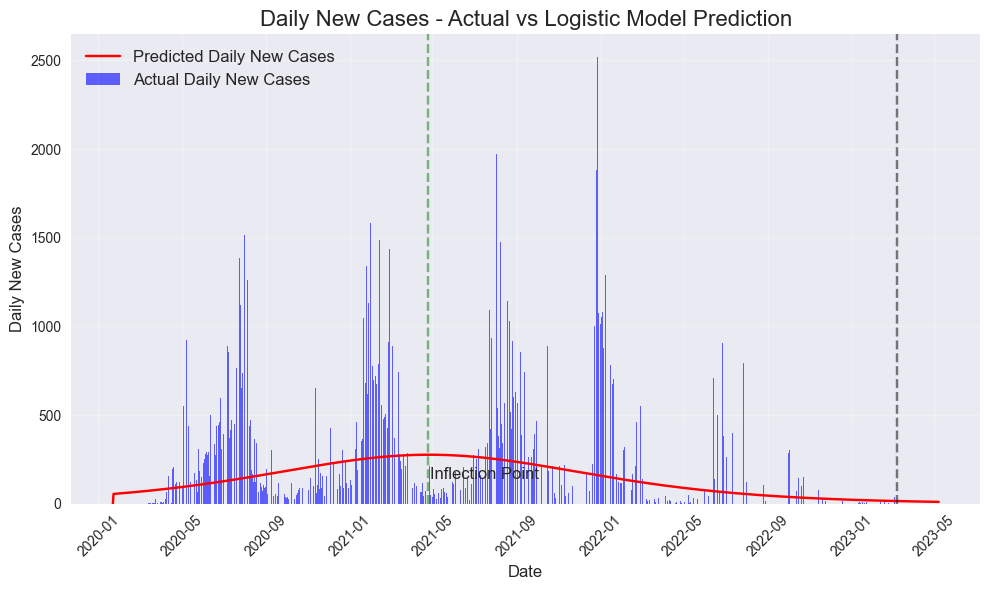

Doubling time: 109.99 days
95% of capacity has already been reached according to the model


In [55]:
# Fit logistic model and get predictions for Ghana
logistic_params, logistic_predictions, metrics = fit_logistic_model(covid_gh, days_to_predict=60)


Logistic Model Parameters:
Carrying capacity (L): 751,832,249
Growth rate (k): 0.005994
Inflection point (t0): Day 731.7

Model Evaluation Metrics:
R² Score: 0.9924
MSE: 435780836991094.75
RMSE: 20875364.36
MAE: 16273312.36


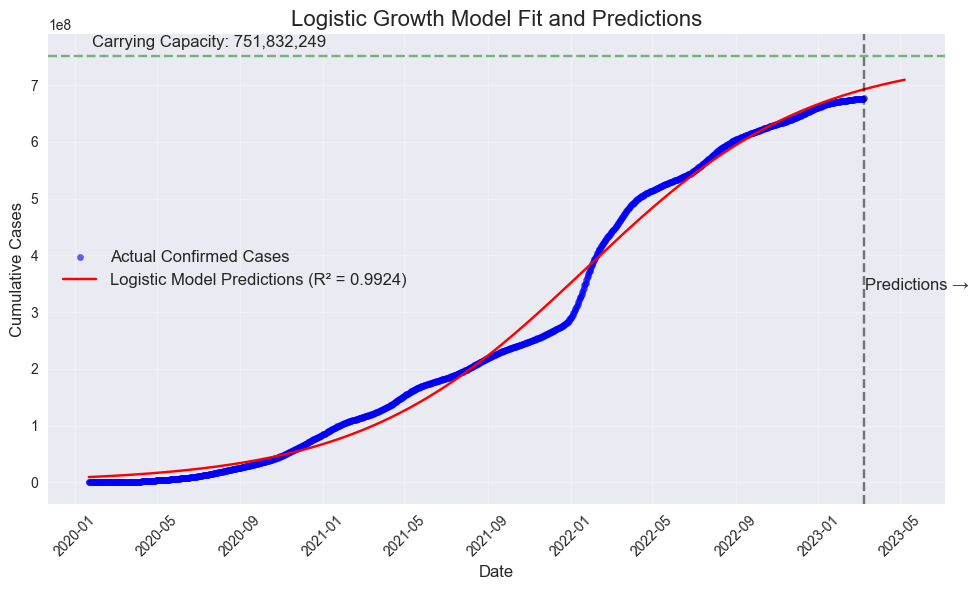

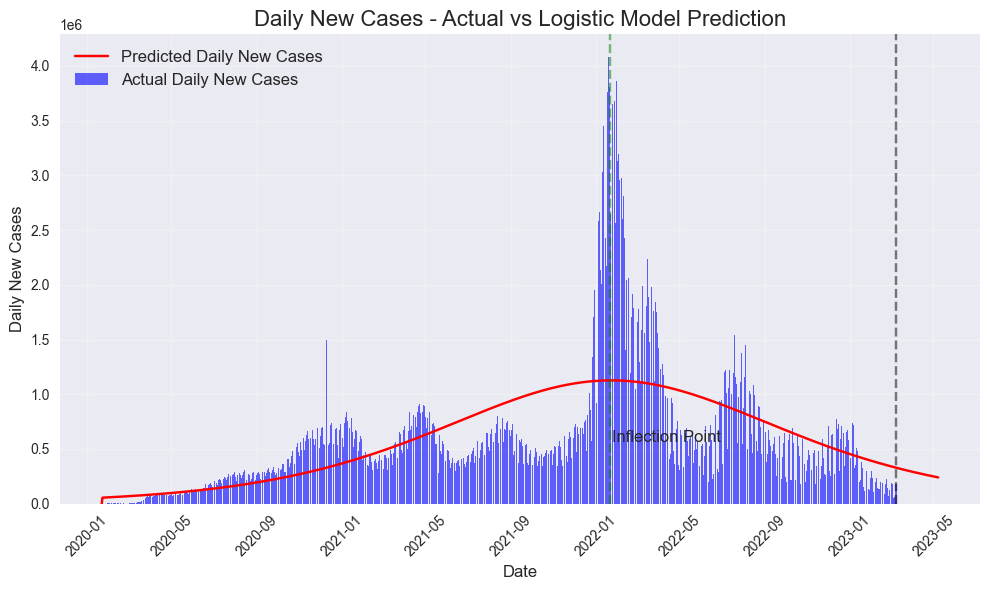

Doubling time: 115.64 days
Days until 95% of capacity reached: 80.9 days from last data point
Estimated date at 95% capacity: 2023-05-28


In [56]:
# Fit logistic model and get predictions for the world
logistic_params, logistic_predictions, metrics = fit_logistic_model(global_trend, days_to_predict=60)

**Since we are done with the EDA, cleaning and the logistic growth model to understand the data, we can prepare our data for the SIR Modelling**

# **S-I-R Modelling**

In [57]:
global_trend.tail()

Date  Confirmed   Deaths     Recovered        Active  \
1138 2023-03-05  676024901  6877749  3.492911e+08  3.198560e+08   
1139 2023-03-06  676082941  6878115  4.012028e+08  2.680020e+08   
1140 2023-03-07  676213378  6879038  3.571762e+08  3.121582e+08   
1141 2023-03-08  676392824  6880483  4.005828e+08  2.689295e+08   
1142 2023-03-09  676570149  6881802  3.526310e+08  3.170574e+08   

      New_Confirmed  New_Deaths  New_Recovered  New_Confirmed_MA7  \
1138        56126.0       148.0  -5.185648e+07      140069.571429   
1139        58040.0       366.0   5.191168e+07      130214.571429   
1140       130437.0       923.0  -4.402662e+07      127305.714286   
1141       179446.0      1445.0   4.340663e+07      121424.571429   
1142       177325.0      1319.0  -4.795187e+07      119748.285714   

      New_Deaths_MA7       CFR  Growth_Rate  
1138      925.857143  1.017381     0.008303  
1139      901.000000  1.017348     0.008585  
1140      908.000000  1.017288     0.019293  
1141      860.000000  1.017232     0.026537  
1142      824.428571  1.017160     0.026216

# Definition of Functions Needed

In [58]:
def sir_model(t, y, beta, gamma, N):
    """
    The SIR model differential equations.

    Parameters:
    t (float): Time point
    y (array): Current state of the system [S, I, R]
    beta (float): Infection rate parameter
    gamma (float): Recovery rate parameter
    N (int): Total population

    Returns:
    list: Derivatives [dS/dt, dI/dt, dR/dt]
    """
    S, I, R = y

    # Ensure S, I, R don't become negative due to numerical errors
    S = max(0, S)
    I = max(0, I)
    R = max(0, R)

    # Calculate derivatives
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I

    return [dSdt, dIdt, dRdt]

In [59]:
def fit_sir_model(country_data, population, days_to_predict=30):
    """
    Fits an SIR model to COVID-19 data and makes predictions

    Parameters:
    country_data (DataFrame): Processed data for a country
    population (int): Total population of the country
    days_to_predict (int): Number of days to predict into the future

    Returns:
    tuple: (fitted parameters, predicted data, time points)
    """
    # Extract data arrays
    confirmed = country_data['Confirmed'].values
    recovered = country_data['Recovered'].values
    deaths = country_data['Deaths'].values
    dates = country_data['Date'].values

    # Calculate active cases
    active = confirmed - recovered - deaths

    # Initial time points (days from start)
    t = np.arange(len(confirmed))

    # Initial conditions
    I0 = active[0]
    R0 = recovered[0] + deaths[0]
    S0 = population - I0 - R0
    y0 = [S0, I0, R0]

    # Define error function to minimize
    def sir_error(params):
        beta, gamma = params

        # Solve Ordinary Differntial Equ system for each time point
        solution = solve_ivp(
            fun=lambda t, y: sir_model(t, y, beta, gamma, population),
            t_span=[0, t[-1]],
            y0=y0,
            t_eval=t,
            method='RK45'
        )

        # Extract solutions
        S = solution.y[0]
        I = solution.y[1]
        R = solution.y[2]

        # Calculate error (sum of squared differences for active and recovered+deaths)
        error_I = np.sum((I - active)**2)
        error_R = np.sum((R - (recovered + deaths))**2)

        return error_I + error_R

    # Initial parameter guess to start the simulation
    initial_guess = [0.3, 0.1]  # beta, gamma

    # Optimize parameters
    result = minimize(
        sir_error,
        initial_guess,
        method='L-BFGS-B',
        bounds=[(0.01, 1), (0.01, 1)]  # Constrain parameters between 0.01 and 1
    )

    # Extract optimized parameters
    beta_opt, gamma_opt = result.x

    # Calculate R0 (basic reproduction number)
    r0 = beta_opt / gamma_opt

    print(f"\nSIR Model Parameters:")
    print(f"Transmission rate (β): {beta_opt:.6f}")
    print(f"Recovery rate (γ): {gamma_opt:.6f}")
    print(f"Basic Reproduction Number (R0): {r0:.4f}")

    # Extend time for predictions
    t_extended = np.arange(len(confirmed) + days_to_predict)

    if isinstance(dates[0], np.datetime64):
        dates = [pd.Timestamp(d).to_pydatetime() for d in dates]

    # To create the future dates
    last_date = dates[-1]
    future_dates = [last_date + timedelta(days=i+1) for i in range(days_to_predict)]

    # Concatenate as Python lists first, then convert to numpy if needed
    extended_dates = np.array(dates + future_dates)

    # Solve the system with optimized parameters
    solution_pred = solve_ivp(
        fun=lambda t, y: sir_model(t, y, beta_opt, gamma_opt, population),
        t_span=[0, t_extended[-1]],
        y0=y0,
        t_eval=t_extended,
        method='RK45'
    )

    # Extract solutions
    S_pred = solution_pred.y[0]
    I_pred = solution_pred.y[1]
    R_pred = solution_pred.y[2]

    # Package results
    fitted_params = {
        'beta': beta_opt,
        'gamma': gamma_opt,
        'r0': r0
    }

    predictions = {
        'S': S_pred,
        'I': I_pred,
        'R': R_pred,
        't': t_extended,
        'dates': extended_dates
    }

    # Plot results
    plt.figure(figsize=(12, 6))

    # Historical and predicted data
    plt.scatter(dates, active, label='Actual Active Cases', color='red', alpha=0.6, s=20)
    plt.scatter(dates, recovered + deaths, label='Actual Recovered + Deaths', color='green', alpha=0.6, s=20)

    # Model predictions
    plt.plot(extended_dates, S_pred, label='Susceptible (Predicted)', color='blue')
    plt.plot(extended_dates, I_pred, label='Infected (Predicted)', color='red')
    plt.plot(extended_dates, R_pred, label='Recovered (Predicted)', color='green')

    # Add vertical line to separate historical data from predictions
    plt.axvline(x=dates[-1], color='black', linestyle='--', alpha=0.5)
    plt.text(dates[-1] + timedelta(days=2), max(S_pred)/2, 'Predictions →', fontsize=12)

    plt.title('SIR Model Fit and Predictions', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of People', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot zoomed in on the active cases
    plt.figure(figsize=(12, 6))
    plt.scatter(dates, active, label='Actual Active Cases', color='red', alpha=0.6, s=20)
    plt.plot(extended_dates, I_pred, label='Infected (Predicted)', color='red')
    plt.axvline(x=dates[-1], color='black', linestyle='--', alpha=0.5)
    plt.text(dates[-1] + timedelta(days=2), max(I_pred)/2, 'Predictions →', fontsize=12)
    plt.title('SIR Model Prediction of Active Cases', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Active Cases', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return fitted_params, predictions, solution_pred

In [60]:
# 7. Calculate epidemiological metrics
def calculate_sir_metrics(fitted_params, predictions, population):
    """
    Calculate important epidemiological metrics from SIR model

    Parameters:
    fitted_params (dict): Fitted parameters
    predictions (dict): Model predictions
    population (int): Total population

    Returns:
    dict: Dictionary of calculated metrics
    """
    beta = fitted_params['beta']
    gamma = fitted_params['gamma']
    r0 = fitted_params['r0']

    # Calculate peak metrics
    peak_infected_idx = np.argmax(predictions['I'])
    peak_infected = predictions['I'][peak_infected_idx]
    peak_day = predictions['t'][peak_infected_idx]
    peak_date = predictions['dates'][peak_infected_idx]

    # Calculate final size
    final_recovered = predictions['R'][-1]
    attack_rate = final_recovered / population * 100

    # Calculate doubling time during early epidemic
    # (Using the formula: ln(2)/r where r = beta*S/N - gamma)
    early_growth_rate = beta * (predictions['S'][0]/population) - gamma
    doubling_time = np.log(2) / early_growth_rate if early_growth_rate > 0 else float('inf')

    # Calculate serial interval (approximate)
    serial_interval = 1/gamma

    # Calculate herd immunity threshold
    herd_immunity = (1 - 1/r0) * 100 if r0 > 1 else 0

    metrics = {
        'R0': r0,
        'Peak_Day': peak_day,
        'Peak_Date': peak_date,
        'Peak_Infected': peak_infected,
        'Peak_Percentage': peak_infected / population * 100,
        'Final_Attack_Rate': attack_rate,
        'Doubling_Time_Days': doubling_time,
        'Serial_Interval_Days': serial_interval,
        'Herd_Immunity_Threshold': herd_immunity
    }

    # Print metrics in a nice format
    print("\nKey Epidemiological Metrics:")
    print(f"Basic Reproduction Number (R0): {r0:.2f}")
    print(f"Peak Infected: {peak_infected:,.0f} people ({metrics['Peak_Percentage']:.2f}% of population)")
    print(f"Day of Peak Infection: Day {peak_day:.0f} ({peak_date.strftime('%Y-%m-%d')})")
    print(f"Final Attack Rate: {attack_rate:.2f}%")
    print(f"Estimated Doubling Time: {doubling_time:.2f} days")
    print(f"Estimated Serial Interval: {serial_interval:.2f} days")
    print(f"Herd Immunity Threshold: {herd_immunity:.2f}% of population")

    return metrics

# Running the Model Fitting and Predictions

In [61]:
country_data = global_trend

In [62]:
# Function for model fitting and predictions
def run_covid_sir_prediction(population, days_to_predict=60):
    """
    Run the COVID-19 SIR model fitting and prediction part

    Parameters:
    population (int): Country population
    days_to_predict (int): Days to predict into the future

    Returns:
    tuple: (fitted_params, predictions, metrics)
    """
    print(f"Starting COVID-19 SIR modeling prediction globally")

    # Fit SIR model and get predictions
    fitted_params, predictions, solution_pred = fit_sir_model(country_data, population, days_to_predict)

    # Calculate epidemiological metrics
    metrics = calculate_sir_metrics(fitted_params, predictions, population)

    print(f"Completed COVID-19 SIR prediction.")

    return fitted_params, predictions, metrics, solution_pred

Starting COVID-19 SIR modeling prediction globally

SIR Model Parameters:
Transmission rate (β): 0.027121
Recovery rate (γ): 0.010000
Basic Reproduction Number (R0): 2.7121


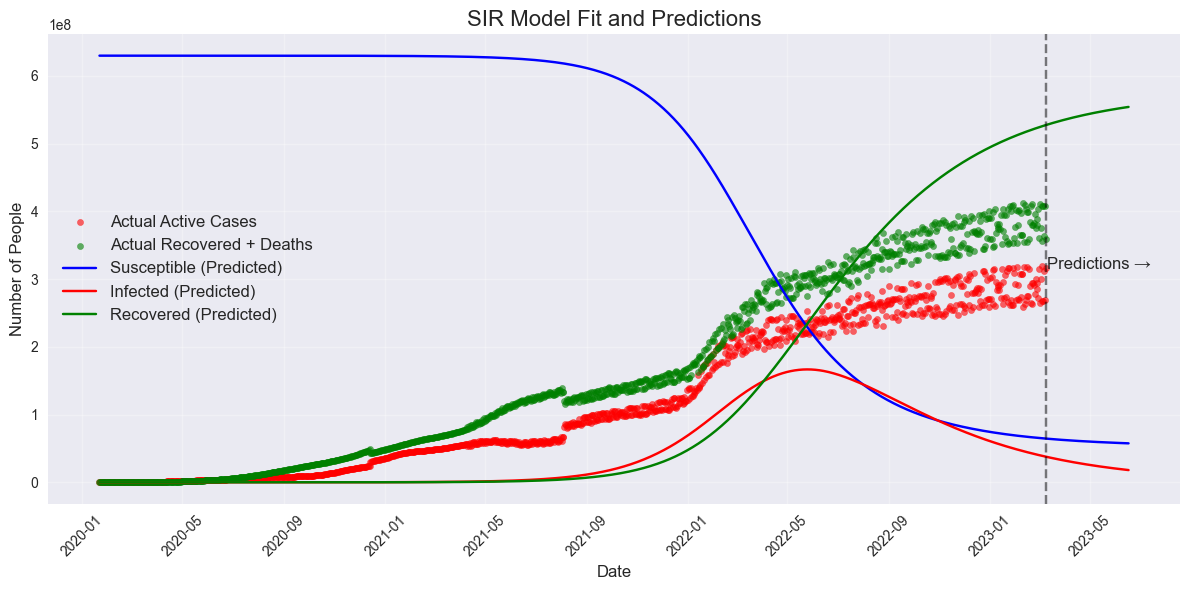

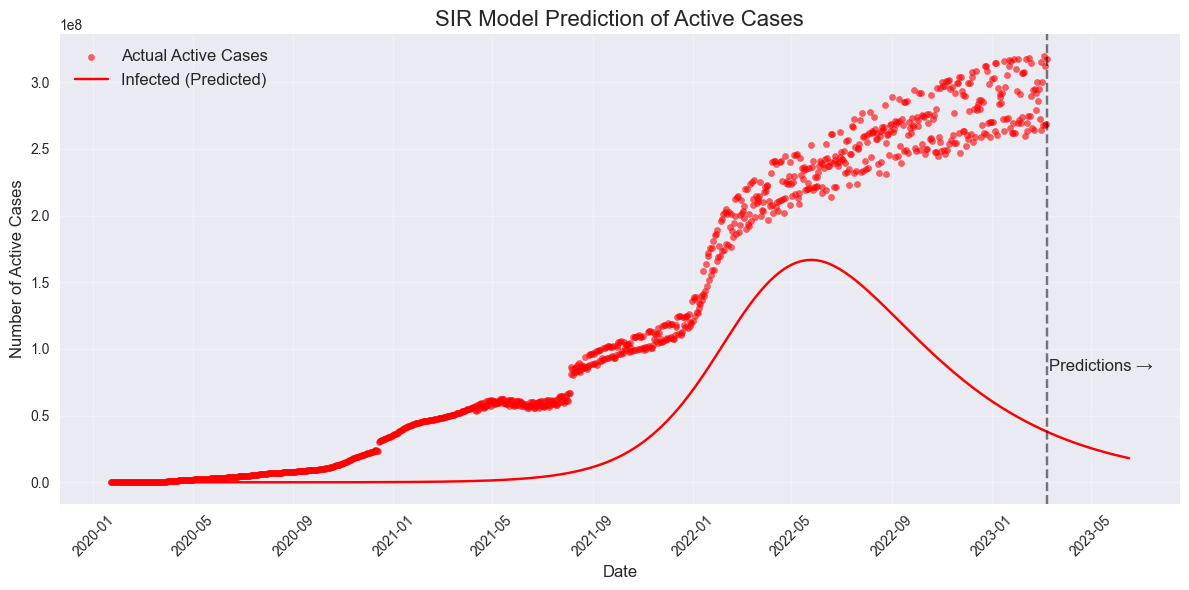


Key Epidemiological Metrics:
Basic Reproduction Number (R0): 2.71
Peak Infected: 166,739,023 people (26.47% of population)
Day of Peak Infection: Day 854 (2022-05-25)
Final Attack Rate: 87.99%
Estimated Doubling Time: 40.49 days
Estimated Serial Interval: 100.00 days
Herd Immunity Threshold: 63.13% of population
Completed COVID-19 SIR prediction.


In [63]:
# Example of how to use the separated functions:
population = 630000000  # world population (approximate)

# Run the prediction
fitted_params, predictions, metrics, solution_pred = run_covid_sir_prediction(population, days_to_predict=100)

# **Model Validation using one of the most important parameter: R0 by comparing the answer of our data to that of the real world data**

**According to the National centre for Biotechnology Information in November 2020. Authored by Nithya C Achaiah, Sindhu B Subbarajasetty and Rajesh M Shetty**

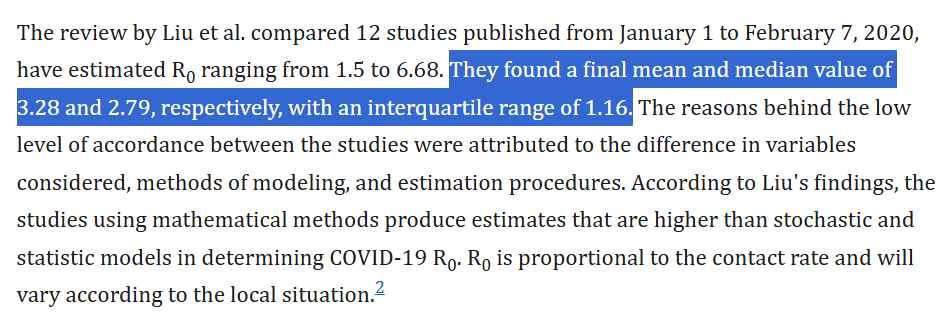

**According to ABC news**

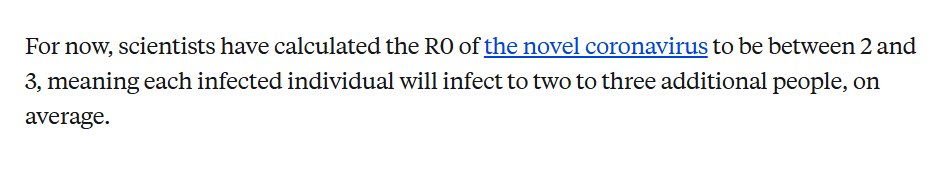

**Acording to the World Health Organization**

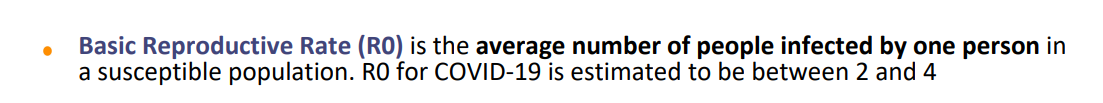

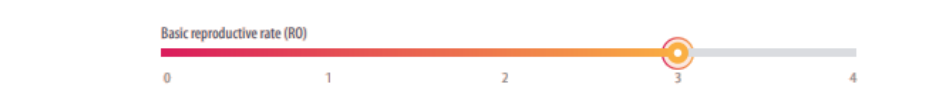

# Running the First Intervention Strategy: Early and Delayed Lockdown(also measuring the reduction in contact) by using the Beta parameter

In [64]:
# 8. Simulate intervention strategies
def perform_intervention_analysis(fitted_params, population, initial_conditions, extended_dates, intervention_day=30):
    """
    Simulate the effect of interventions on disease spread

    Parameters:
    fitted_params (dict): Parameters fitted from historical data
    population (int): Total population
    initial_conditions (list): Initial [S0, I0, R0]
    extended_dates (array): Array of dates for simulation
    intervention_day (int): Day when intervention starts

    Returns:
    tuple: (Results dictionary, Comparison dataframe)
    """
    # Base parameters
    beta = fitted_params['beta']
    gamma = fitted_params['gamma']

    # Time points
    days = len(extended_dates)
    t = np.arange(days)

    # Define intervention scenarios (reduce beta by different amounts)
    scenarios = {
        'No Lockdown intervention': 1.0,
        'Mild Lockdown (25% reduction)': 0.75,
        'Moderate Lockdown (50% reduction)': 0.5,
        'Strong Lockdown (75% reduction)': 0.25
    }

    results = {}

    # Simulate each scenario
    for scenario, beta_factor in scenarios.items():
        # Function for ODE solver with intervention
        def sir_model_with_intervention(t, y, beta, gamma, N, intervention_time, beta_factor):
            if t < intervention_time:
                current_beta = beta
            else:
                current_beta = beta * beta_factor

            return sir_model(t, y, current_beta, gamma, N)

        # Solve the system
        solution = solve_ivp(
            fun=lambda t, y: sir_model_with_intervention(t, y, beta, gamma, population, intervention_day, beta_factor),
            t_span=[0, days-1],
            y0=initial_conditions,
            t_eval=t,
            method='RK45'
        )

        # Store results
        results[scenario] = {
            'S': solution.y[0],
            'I': solution.y[1],
            'R': solution.y[2],
            't': solution.t
        }

    # Plot results
    plt.figure(figsize=(12, 6))

    for scenario, result in results.items():
        plt.plot(extended_dates, result['I'], label=f'{scenario} - Infected')

    # Mark intervention start date
    intervention_date = extended_dates[intervention_day]
    plt.axvline(x=intervention_date, color='black', linestyle='--', alpha=0.5)
    plt.text(intervention_date + timedelta(days=5), max(results['No Lockdown intervention']['I'])/2, 'Intervention Start', fontsize=12)

    plt.title('Effect of Different Lockdown Strategies(Contacts) on Infected Population', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Infected', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Compare peak infections and total infections
    comparison = {}
    for scenario, result in results.items():
        peak_idx = np.argmax(result['I'])
        comparison[scenario] = {
            'Peak Infections': max(result['I']),
            'Peak Day': result['t'][peak_idx],
            'Peak Date': extended_dates[peak_idx],
            'Total Infections': result['R'][-1],
            'Percentage Infected': result['R'][-1] / population * 100
        }

    comparison_df = pd.DataFrame(comparison).T
    print("\nIntervention Strategy Comparison:")
    print(comparison_df)

    # Format the dataframe for better display
    formatted_df = comparison_df.copy()
    formatted_df['Peak Infections'] = formatted_df['Peak Infections'].map('{:,.0f}'.format)
    formatted_df['Percentage Infected'] = formatted_df['Percentage Infected'].map('{:.2f}%'.format)
    formatted_df['Total Infections'] = formatted_df['Total Infections'].map('{:,.0f}'.format)

    return results, formatted_df

In [65]:
# Function for intervention analysis
def run_covid_sir_intervention(fitted_params, predictions, population, intervention_time=30):
    """
    Run the COVID-19 SIR intervention analysis

    Parameters:
    fitted_params: Parameters from the fitted SIR model
    predictions: Predictions from the SIR model
    population (int): Country population
    intervention_time (int): Day when intervention is to run for

    Returns:
    tuple: (intervention_results, comparison)
    """
    print(f"Starting COVID-19 SIR intervention analysis")

    # Set up initial conditions for intervention analysis
    initial_conditions = [
        predictions['S'][0],
        predictions['I'][0],
        predictions['R'][0]
    ]

    # Running the intervention
    intervention_day = min(intervention_time, len(country_data) // 2)

    # Perform intervention analysis
    intervention_results, comparison = perform_intervention_analysis(
        fitted_params,
        population,
        initial_conditions,
        predictions['dates'],
        intervention_day
    )

    print(f"Completed COVID-19 SIR intervention analysis.")

    return intervention_results, comparison

Starting COVID-19 SIR intervention analysis


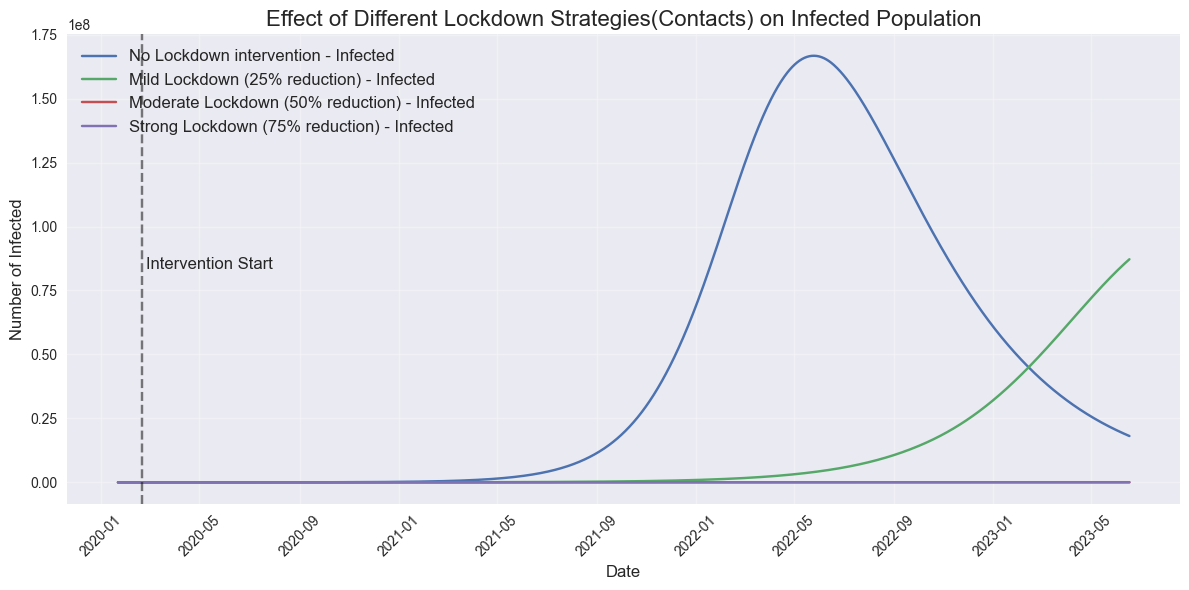


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)       87204221.002368     1242   
Moderate Lockdown (50% reduction)      58770.029643     1242   
Strong Lockdown (75% reduction)          866.877467       34   

                                             Peak Date Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00   554309243.5106   
Mild Lockdown (25% reduction)      2023-06-17 00:00:00  133676621.13866   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00    163218.048499   
Strong Lockdown (75% reduction)    2020-02-25 00:00:00      2908.506788   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               21.218511  
Moderate Lockdown (50% reduction)            0.025908  
Strong Lockdown (75% reduction)             

In [66]:
intervention_results, comparison = run_covid_sir_intervention(fitted_params, predictions, population, intervention_time=30)

# Early and Delayed Lockdown

Starting COVID-19 SIR intervention analysis


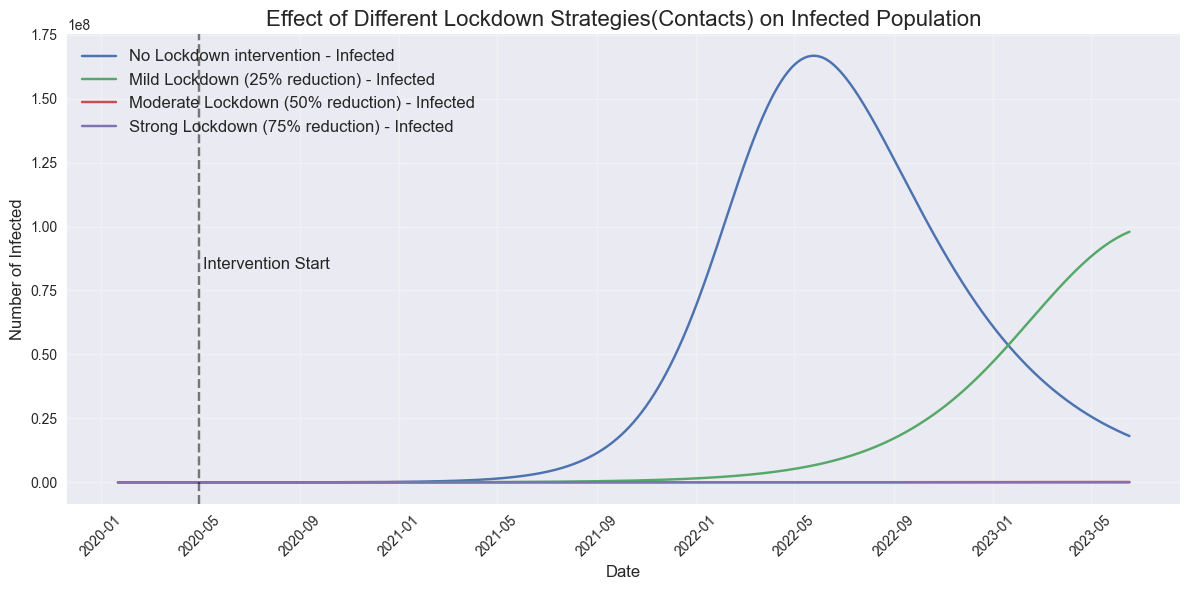


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)       97941121.725452     1242   
Moderate Lockdown (50% reduction)     146389.544489     1242   
Strong Lockdown (75% reduction)         2801.215328      102   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2023-06-17 00:00:00  180837697.934452   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00      406171.55095   
Strong Lockdown (75% reduction)    2020-05-03 00:00:00       9901.315872   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               28.704396  
Moderate Lockdown (50% reduction)            0.064472  
Strong Lockdown (75% reduction)        

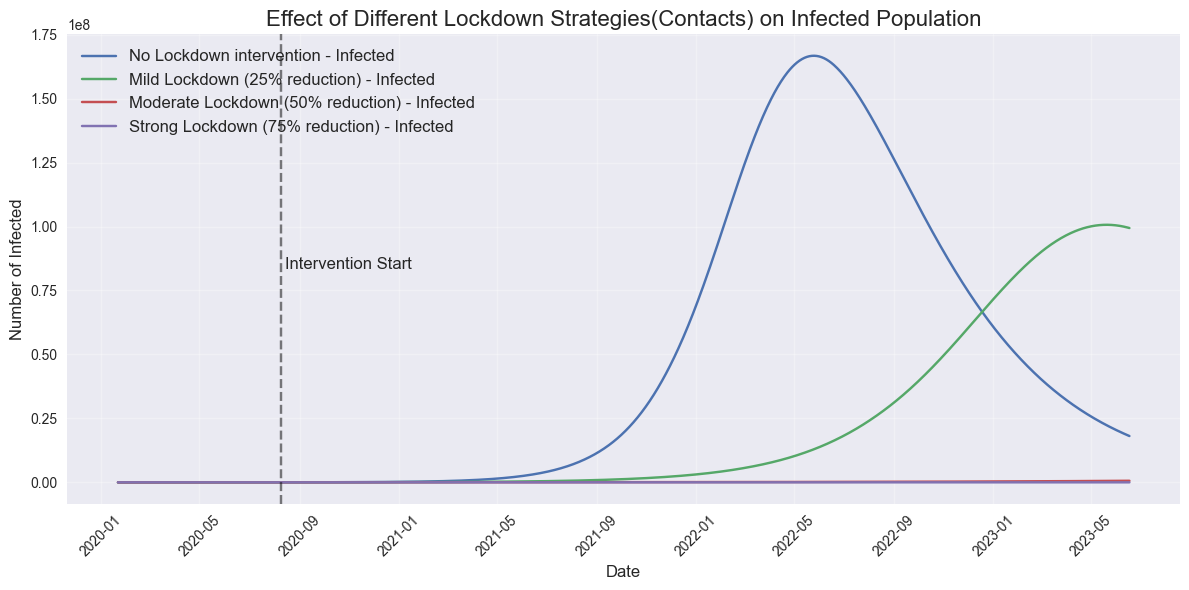


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      100672047.818005     1214   
Moderate Lockdown (50% reduction)     614514.113506     1242   
Strong Lockdown (75% reduction)        15687.227379      202   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2023-05-20 00:00:00  248804787.434757   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00    1704103.698939   
Strong Lockdown (75% reduction)    2020-08-11 00:00:00      56113.602145   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               39.492823  
Moderate Lockdown (50% reduction)            0.270493  
Strong Lockdown (75% reduction)        

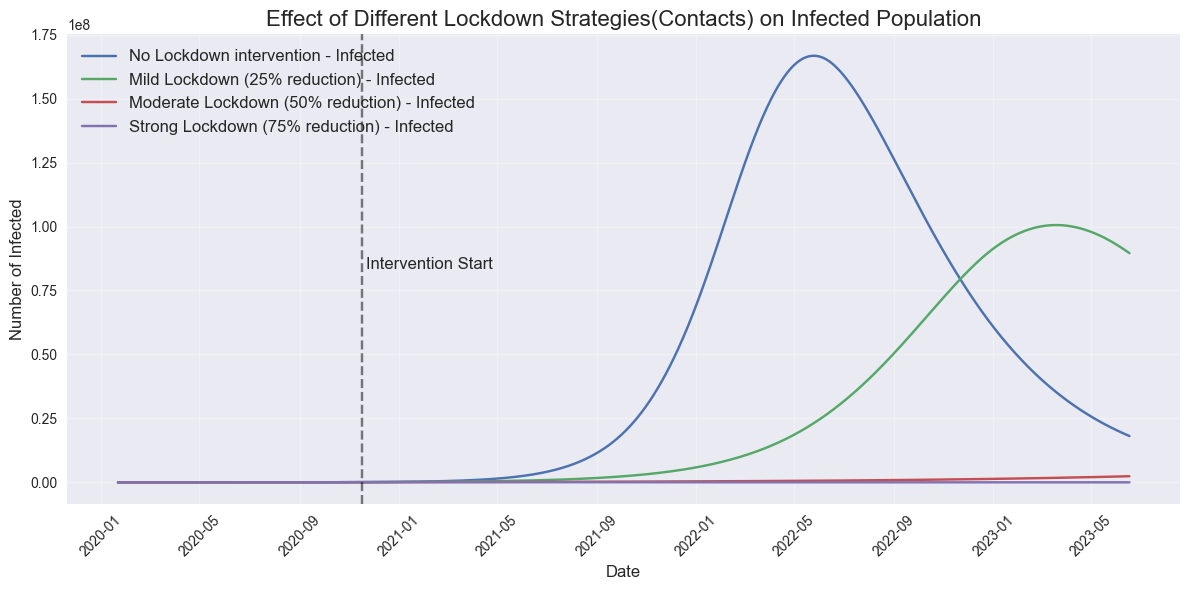


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      100565636.576818     1152   
Moderate Lockdown (50% reduction)    2390062.128009     1242   
Strong Lockdown (75% reduction)        85576.394943      302   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2023-03-19 00:00:00  309170973.800259   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00    6702017.222543   
Strong Lockdown (75% reduction)    2020-11-19 00:00:00     303910.821784   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               49.074758  
Moderate Lockdown (50% reduction)            1.063812  
Strong Lockdown (75% reduction)        

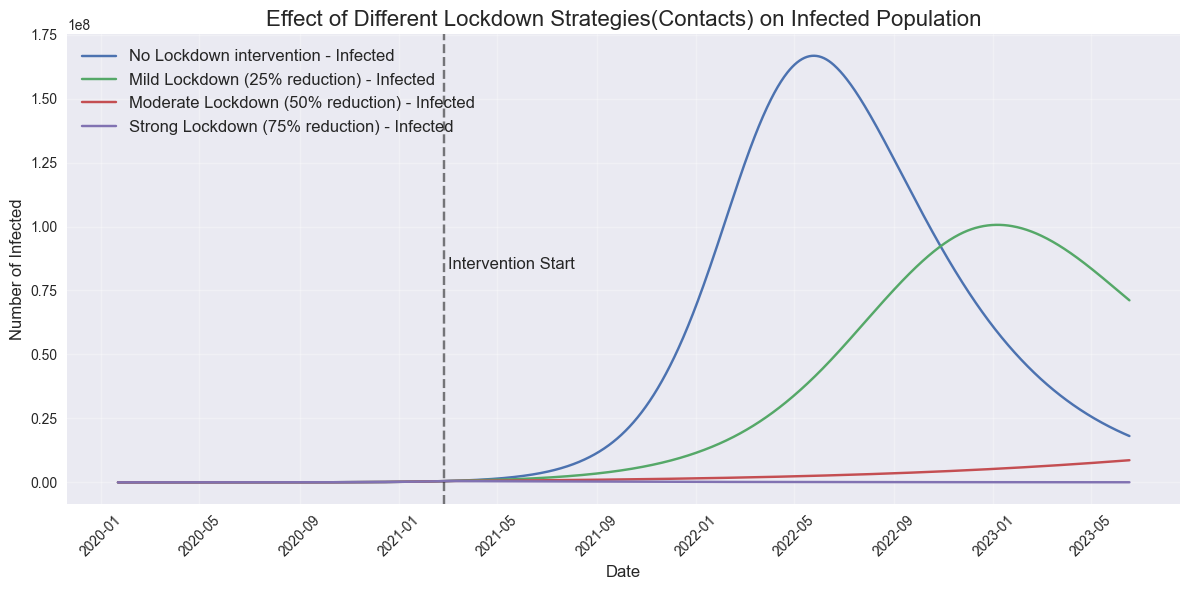


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      100648599.497247     1080   
Moderate Lockdown (50% reduction)    8647845.435471     1242   
Strong Lockdown (75% reduction)        502450.86195      408   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2023-01-06 00:00:00  364601306.622429   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00   25835741.935708   
Strong Lockdown (75% reduction)    2021-03-05 00:00:00    1745938.052373   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               57.873223  
Moderate Lockdown (50% reduction)            4.100911  
Strong Lockdown (75% reduction)        

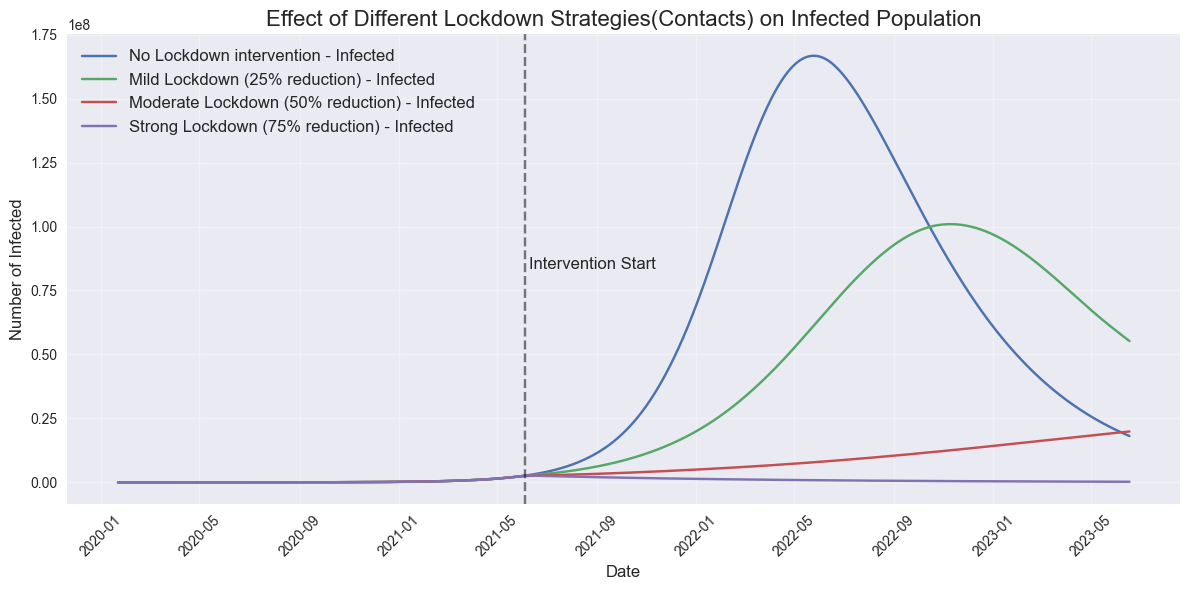


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      100922172.908138     1022   
Moderate Lockdown (50% reduction)    19875374.28326     1242   
Strong Lockdown (75% reduction)      2668879.239686      504   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2022-11-09 00:00:00  401303375.332467   
Moderate Lockdown (50% reduction)  2023-06-17 00:00:00    70685070.08631   
Strong Lockdown (75% reduction)    2021-06-09 00:00:00    9026855.039405   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               63.698948  
Moderate Lockdown (50% reduction)           11.219852  
Strong Lockdown (75% reduction)        

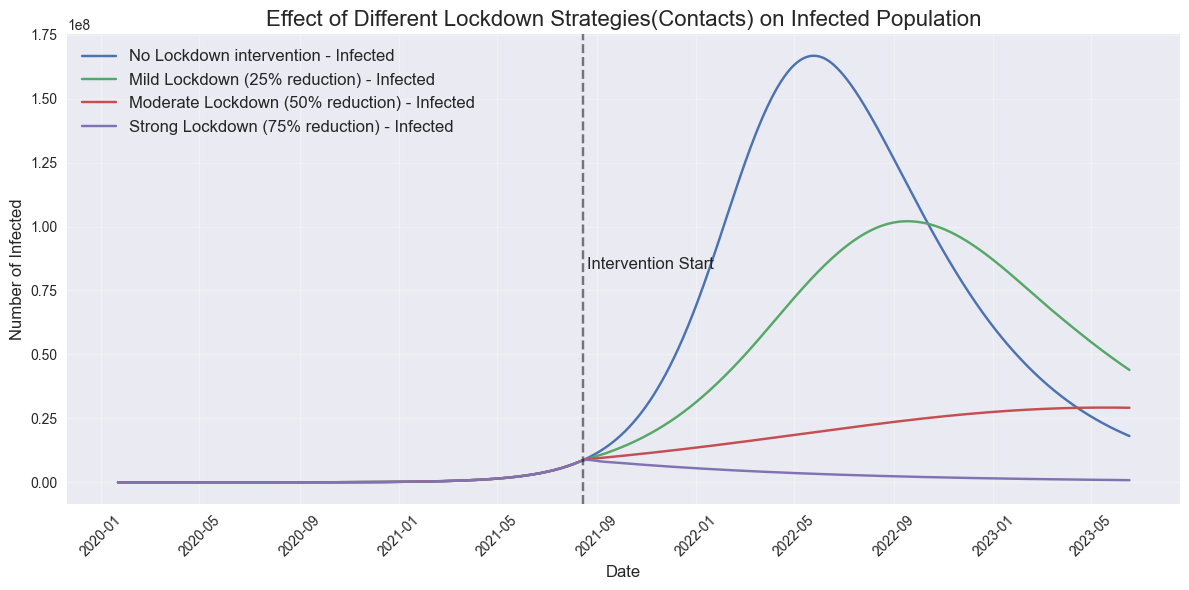


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      102055852.142976      970   
Moderate Lockdown (50% reduction)   29230387.448137     1212   
Strong Lockdown (75% reduction)      8784089.313513      577   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2022-09-18 00:00:00  428263680.631561   
Moderate Lockdown (50% reduction)  2023-05-18 00:00:00  145187251.470411   
Strong Lockdown (75% reduction)    2021-08-21 00:00:00   28292696.345164   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               67.978362  
Moderate Lockdown (50% reduction)           23.045595  
Strong Lockdown (75% reduction)        

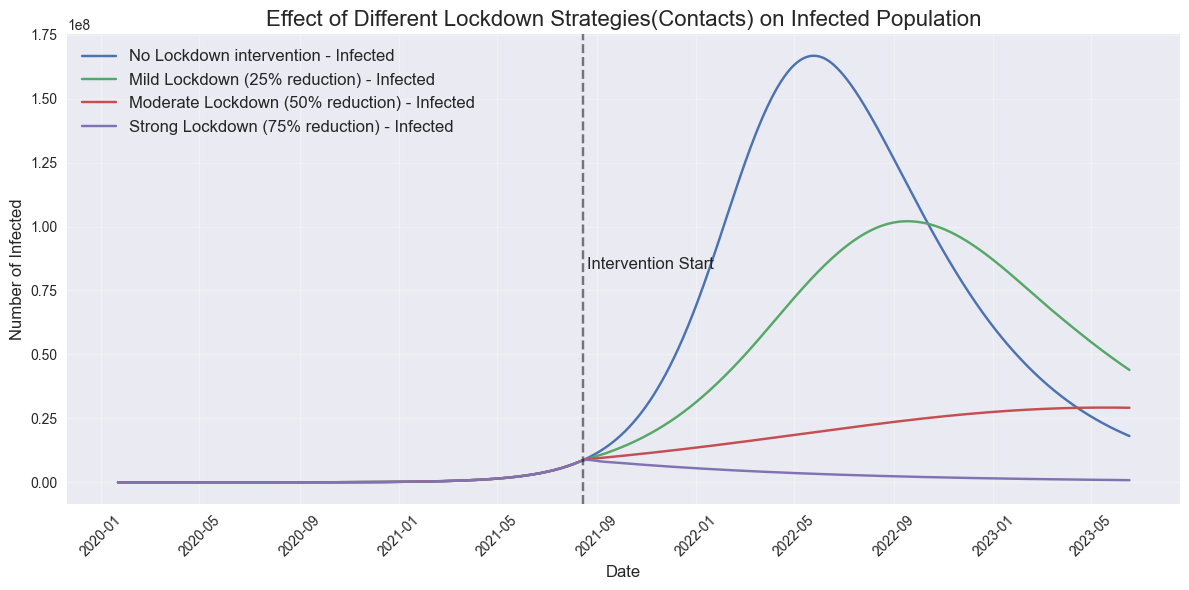


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      102055852.142976      970   
Moderate Lockdown (50% reduction)   29230387.448137     1212   
Strong Lockdown (75% reduction)      8784089.313513      577   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2022-09-18 00:00:00  428263680.631561   
Moderate Lockdown (50% reduction)  2023-05-18 00:00:00  145187251.470411   
Strong Lockdown (75% reduction)    2021-08-21 00:00:00   28292696.345164   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               67.978362  
Moderate Lockdown (50% reduction)           23.045595  
Strong Lockdown (75% reduction)        

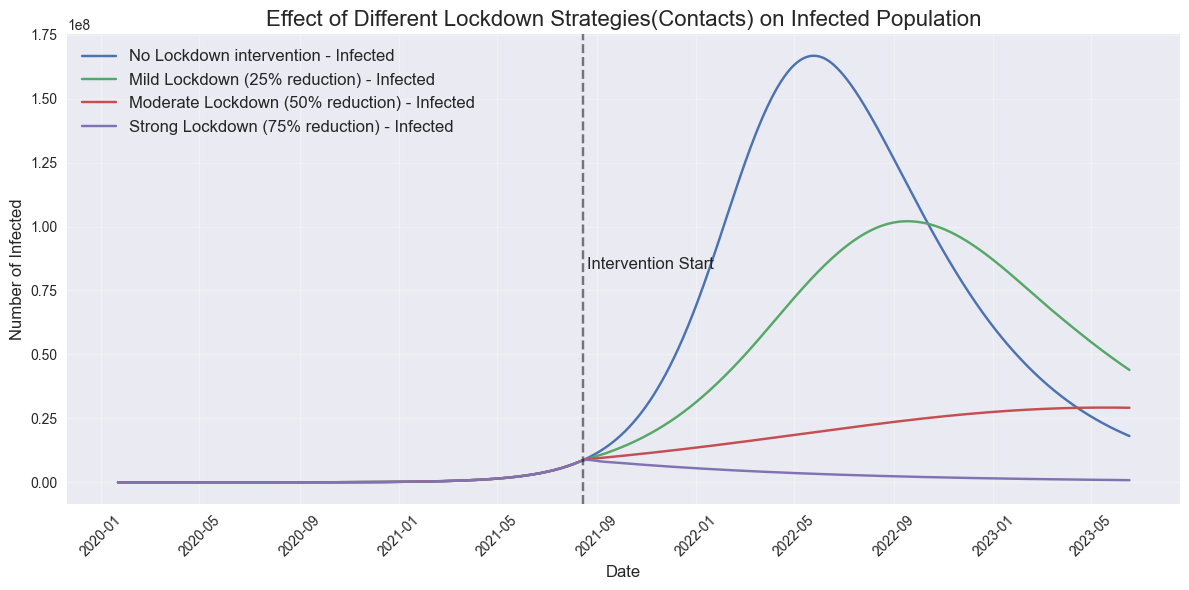


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      102055852.142976      970   
Moderate Lockdown (50% reduction)   29230387.448137     1212   
Strong Lockdown (75% reduction)      8784089.313513      577   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2022-09-18 00:00:00  428263680.631561   
Moderate Lockdown (50% reduction)  2023-05-18 00:00:00  145187251.470411   
Strong Lockdown (75% reduction)    2021-08-21 00:00:00   28292696.345164   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               67.978362  
Moderate Lockdown (50% reduction)           23.045595  
Strong Lockdown (75% reduction)        

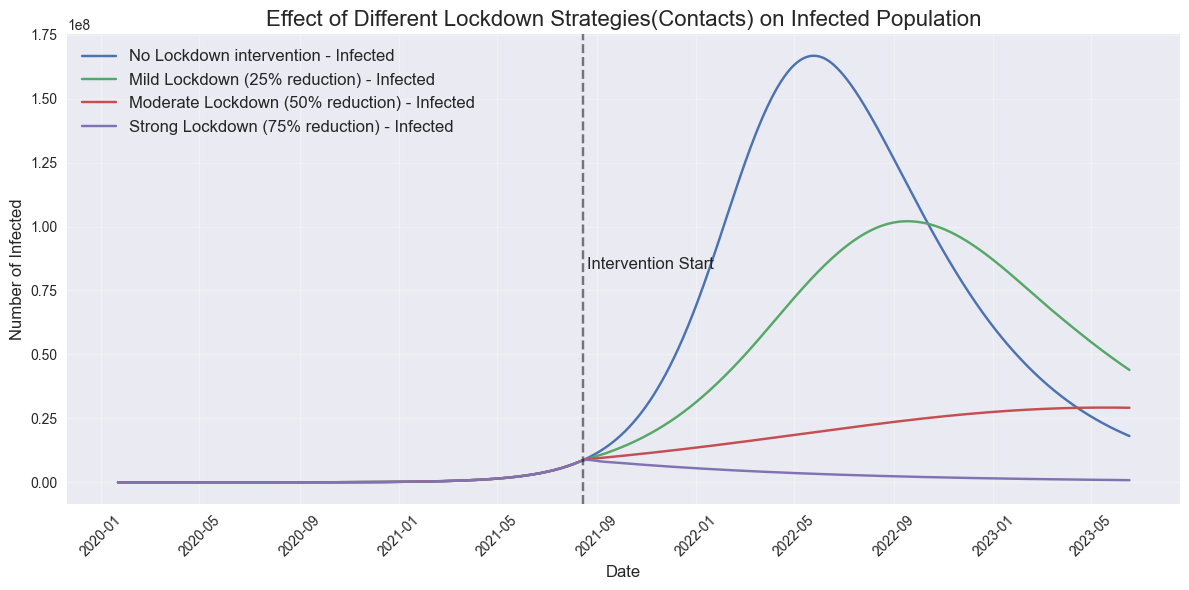


Intervention Strategy Comparison:
                                    Peak Infections Peak Day  \
No Lockdown intervention           166739023.452661      854   
Mild Lockdown (25% reduction)      102055852.142976      970   
Moderate Lockdown (50% reduction)   29230387.448137     1212   
Strong Lockdown (75% reduction)      8784089.313513      577   

                                             Peak Date  Total Infections  \
No Lockdown intervention           2022-05-25 00:00:00    554309243.5106   
Mild Lockdown (25% reduction)      2022-09-18 00:00:00  428263680.631561   
Moderate Lockdown (50% reduction)  2023-05-18 00:00:00  145187251.470411   
Strong Lockdown (75% reduction)    2021-08-21 00:00:00   28292696.345164   

                                  Percentage Infected  
No Lockdown intervention                    87.985594  
Mild Lockdown (25% reduction)               67.978362  
Moderate Lockdown (50% reduction)           23.045595  
Strong Lockdown (75% reduction)        

In [67]:
#doing the intervantion for different intervention start dates from 100 to 500
for intervention_time in range(100, 1000, 100):
  intervention_results, comparison = run_covid_sir_intervention(fitted_params, predictions, population, intervention_time)

# Simulating the use of vaccines by using the gamma parameter

In [68]:
def perform_vaccination_intervention(fitted_params, population, initial_conditions, extended_dates, intervention_day=30):
    """
    Simulate the effect of vaccination on disease spread by increasing recovery rate (gamma)

    Parameters:
    fitted_params (dict): Parameters fitted from historical data
    population (int): Total population
    initial_conditions (list): Initial [S0, I0, R0]
    extended_dates (array): Array of dates for simulation
    intervention_day (int): Day when vaccination intervention starts

    Returns:
    tuple: (Results dictionary, Comparison dataframe)
    """
    # Base parameters
    beta = fitted_params['beta']
    gamma = fitted_params['gamma']

    # Time points
    days = len(extended_dates)
    t = np.arange(days)

    # Define vaccination scenarios (increase gamma by different amounts)
    scenarios = {
        'No Vaccination': 1.0,
        'Low Vaccination Coverage (25% increase)': 1.25,
        'Medium Vaccination Coverage (50% increase)': 1.5,
        'High Vaccination Coverage (75% increase)': 1.75,
        'Very High Vaccination Coverage (100% increase)': 2.0
    }

    results = {}

    # Simulate each scenario
    for scenario, gamma_factor in scenarios.items():
        # Function for ODE solver with vaccination intervention
        def sir_model_with_vaccination(t, y, beta, gamma, N, intervention_time, gamma_factor):
            if t < intervention_time:
                current_gamma = gamma
            else:
                current_gamma = gamma * gamma_factor

            return sir_model(t, y, beta, current_gamma, N)

        # Solve the system
        solution = solve_ivp(
            fun=lambda t, y: sir_model_with_vaccination(t, y, beta, gamma, population, intervention_day, gamma_factor),
            t_span=[0, days-1],
            y0=initial_conditions,
            t_eval=t,
            method='RK45'
        )

        # Store results
        results[scenario] = {
            'S': solution.y[0],
            'I': solution.y[1],
            'R': solution.y[2],
            't': solution.t
        }

    # Plot results
    plt.figure(figsize=(12, 6))

    for scenario, result in results.items():
        plt.plot(extended_dates, result['I'], label=f'{scenario} - Infected')

    # Mark intervention start date
    intervention_date = extended_dates[intervention_day]
    plt.axvline(x=intervention_date, color='black', linestyle='--', alpha=0.5)
    plt.text(intervention_date + timedelta(days=5), max(results['No Vaccination']['I'])/2, 'Vaccination Start', fontsize=12)

    plt.title('Effect of Vaccination (Increased Recovery Rate) on Infected Population', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Infected', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Compare peak infections and total infections
    comparison = {}
    for scenario, result in results.items():
        peak_idx = np.argmax(result['I'])
        comparison[scenario] = {
            'Peak Infections': max(result['I']),
            'Peak Day': result['t'][peak_idx],
            'Peak Date': extended_dates[peak_idx],
            'Total Infections': result['R'][-1],
            'Percentage Infected': result['R'][-1] / population * 100
        }

    comparison_df = pd.DataFrame(comparison).T
    print("\nVaccination Strategy Comparison:")
    print(comparison_df)

    # Format the dataframe for better display
    formatted_df = comparison_df.copy()
    formatted_df['Peak Infections'] = formatted_df['Peak Infections'].map('{:,.0f}'.format)
    formatted_df['Percentage Infected'] = formatted_df['Percentage Infected'].map('{:.2f}%'.format)
    formatted_df['Total Infections'] = formatted_df['Total Infections'].map('{:,.0f}'.format)

    return results, formatted_df

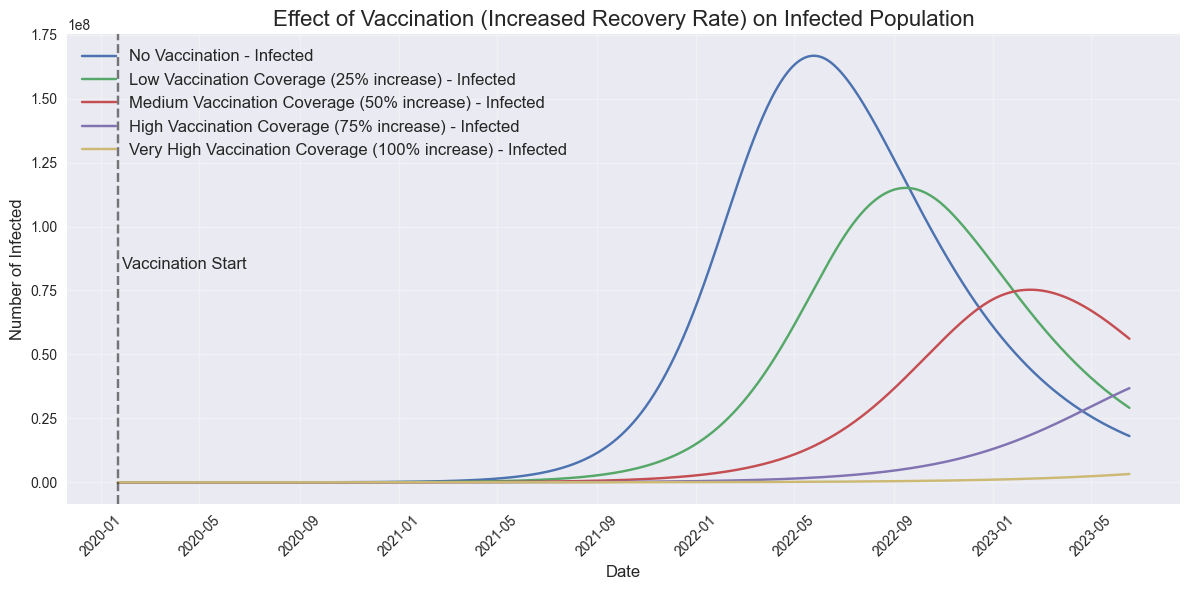


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         115090676.979762      967   
Medium Vaccination Coverage (50% increase)       75288846.631045     1120   
High Vaccination Coverage (75% increase)         36805905.595495     1242   
Very High Vaccination Coverage (100% increase)    3264031.263786     1242   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-09-15 00:00:00   
Medium Vaccination Coverage (50% increase)      2023-02-15 00:00:00   
High Vaccination Coverage (75% increase)        2023-06-17 00:00:00   
Very High Vaccination Coverage (100% increase)  2023-06-17 00:00:00   

                                                Total Infections  \
No Vacci

In [69]:
vaccination_results, vaccination_comparison = perform_vaccination_intervention(
    fitted_params,
    population,
    [predictions['S'][0], predictions['I'][0], predictions['R'][0]],
    predictions['dates'],
    intervention_day=0
)

# Early VS Delayed Vaccination

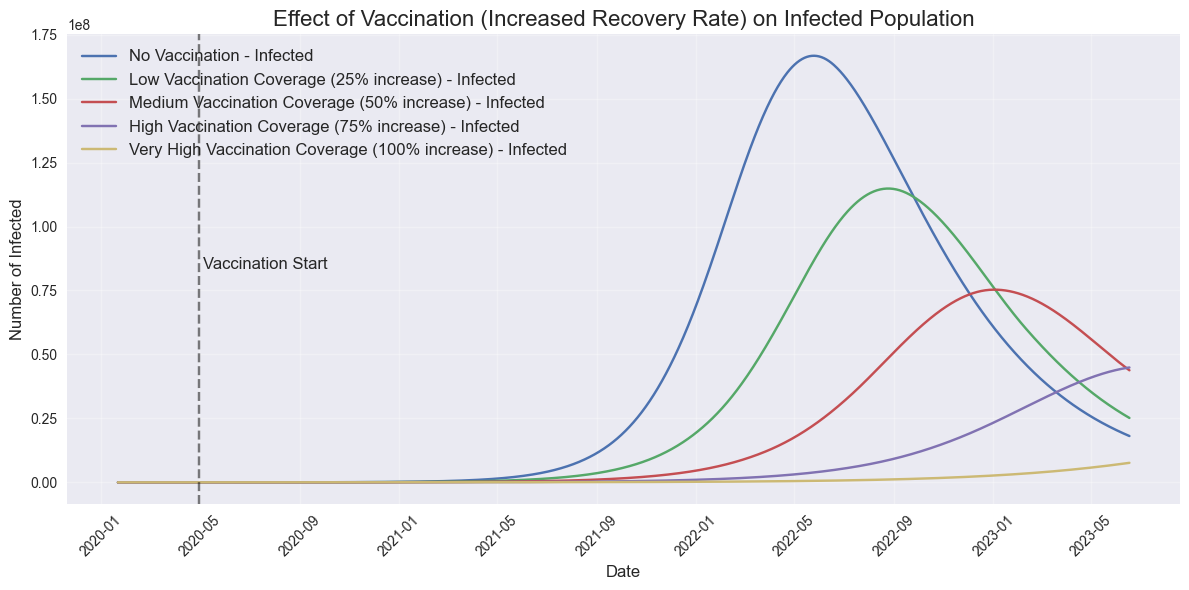


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         114837235.809914      946   
Medium Vaccination Coverage (50% increase)       75313213.804559     1076   
High Vaccination Coverage (75% increase)         44893495.729953     1242   
Very High Vaccination Coverage (100% increase)    7628307.209355     1242   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-08-25 00:00:00   
Medium Vaccination Coverage (50% increase)      2023-01-02 00:00:00   
High Vaccination Coverage (75% increase)        2023-06-17 00:00:00   
Very High Vaccination Coverage (100% increase)  2023-06-17 00:00:00   

                                                Total Infections  \
No Vacci

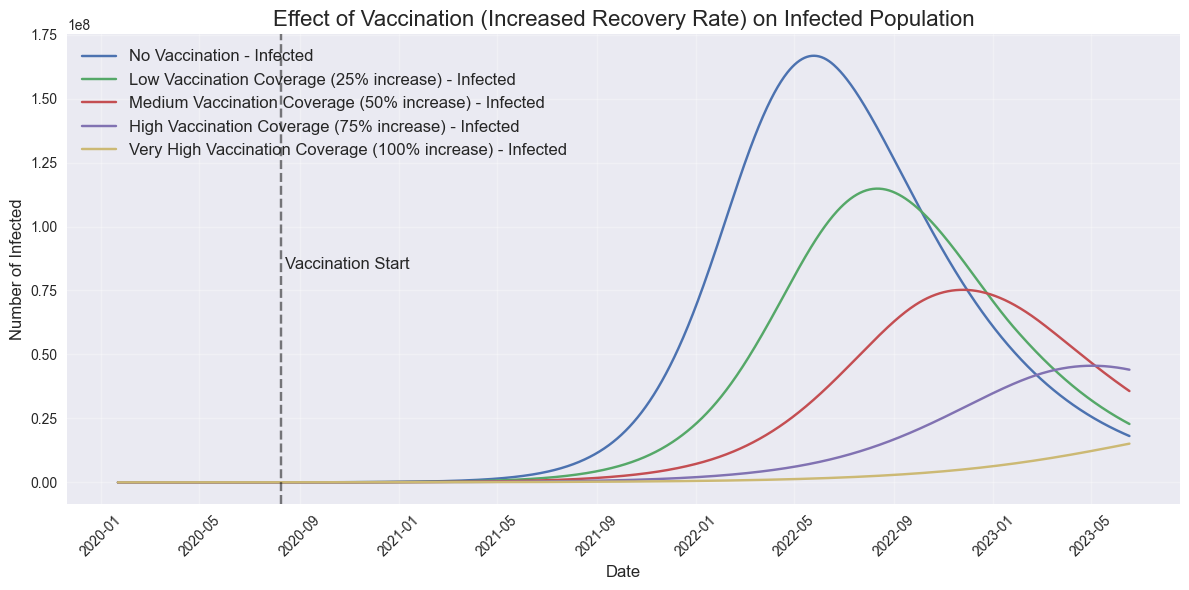


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         114804736.984404      933   
Medium Vaccination Coverage (50% increase)       75249860.678526     1038   
High Vaccination Coverage (75% increase)         45580542.074946     1196   
Very High Vaccination Coverage (100% increase)   15121712.258922     1242   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-08-12 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-11-25 00:00:00   
High Vaccination Coverage (75% increase)        2023-05-02 00:00:00   
Very High Vaccination Coverage (100% increase)  2023-06-17 00:00:00   

                                                Total Infections  \
No Vacci

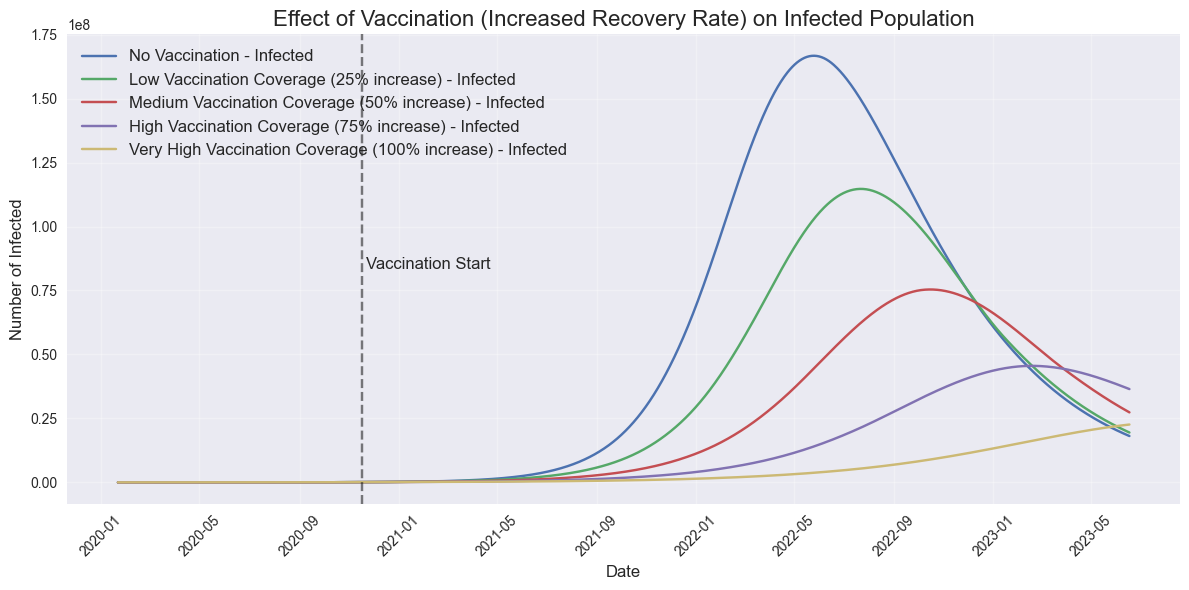


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         114698725.464638      912   
Medium Vaccination Coverage (50% increase)       75382783.198216      997   
High Vaccination Coverage (75% increase)         45535007.816485     1122   
Very High Vaccination Coverage (100% increase)   22598034.267691     1242   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-07-22 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-10-15 00:00:00   
High Vaccination Coverage (75% increase)        2023-02-17 00:00:00   
Very High Vaccination Coverage (100% increase)  2023-06-17 00:00:00   

                                                Total Infections  \
No Vacci

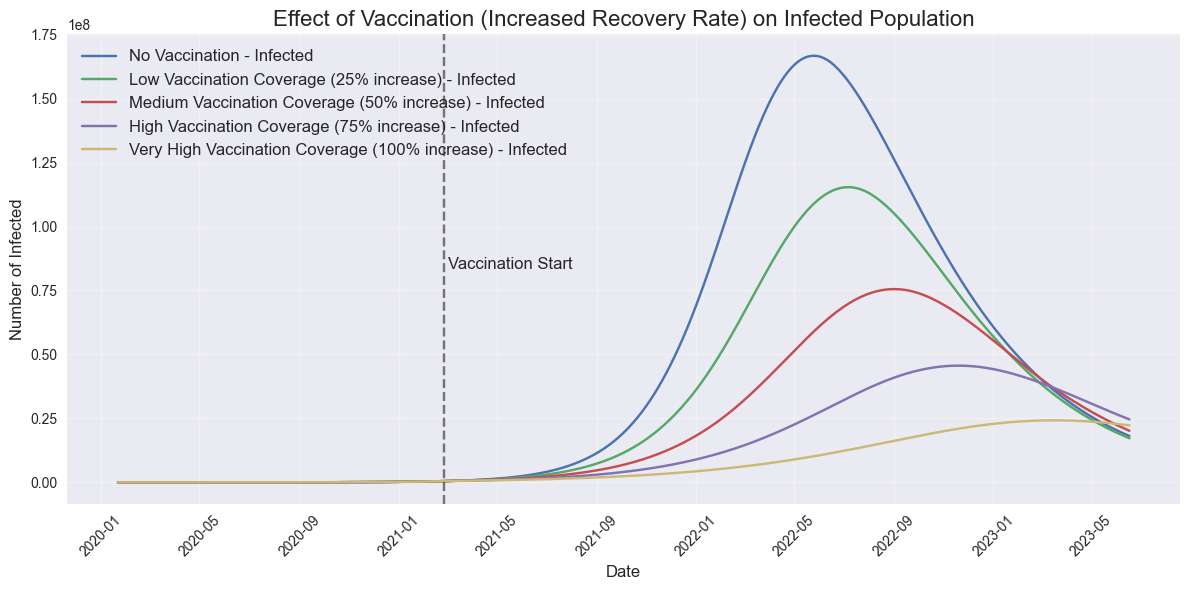


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         115375919.693461      897   
Medium Vaccination Coverage (50% increase)       75535467.415928      953   
High Vaccination Coverage (75% increase)          45615957.22941     1032   
Very High Vaccination Coverage (100% increase)   24239186.210447     1150   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-07-07 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-09-01 00:00:00   
High Vaccination Coverage (75% increase)        2022-11-19 00:00:00   
Very High Vaccination Coverage (100% increase)  2023-03-17 00:00:00   

                                                Total Infections  \
No Vacci

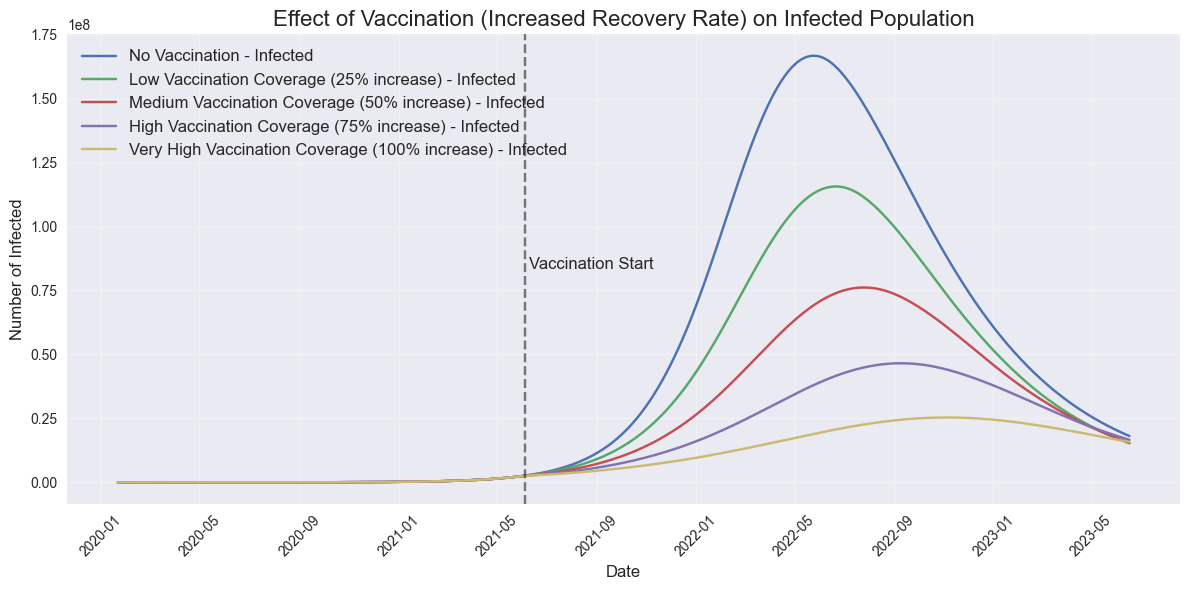


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         115652047.647114      881   
Medium Vaccination Coverage (50% increase)       76162613.479002      916   
High Vaccination Coverage (75% increase)         46542972.866966      961   
Very High Vaccination Coverage (100% increase)   25354788.509964     1018   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-06-21 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-07-26 00:00:00   
High Vaccination Coverage (75% increase)        2022-09-09 00:00:00   
Very High Vaccination Coverage (100% increase)  2022-11-05 00:00:00   

                                                Total Infections  \
No Vacci

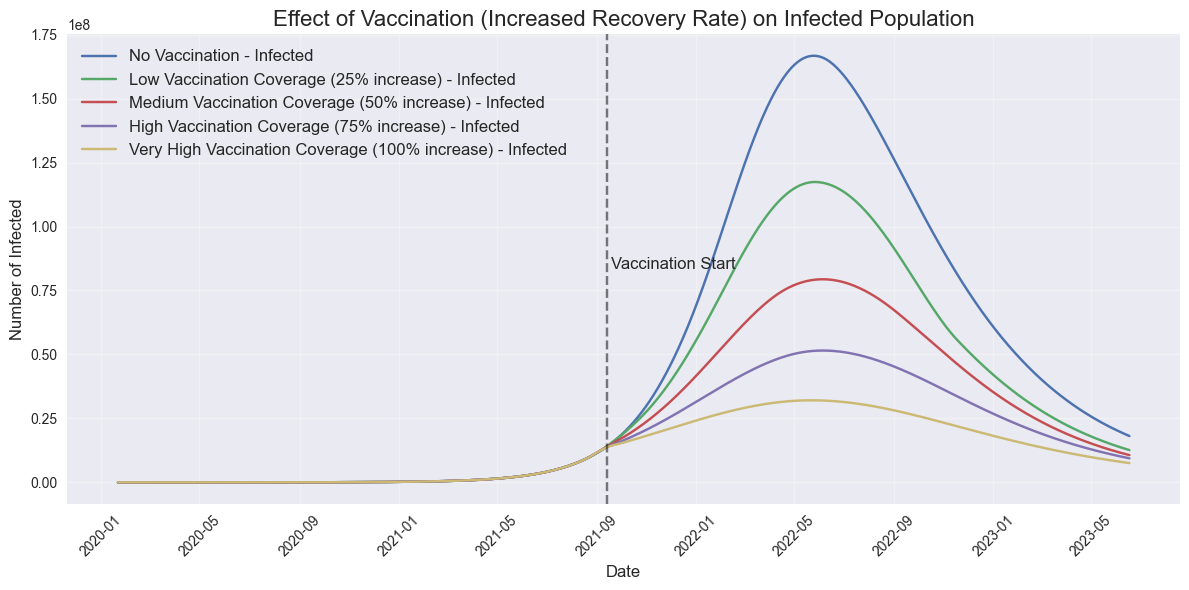


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)          117400349.14738      856   
Medium Vaccination Coverage (50% increase)       79377569.662092      865   
High Vaccination Coverage (75% increase)         51516636.795968      866   
Very High Vaccination Coverage (100% increase)   32068225.546231      852   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-05-27 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-06-05 00:00:00   
High Vaccination Coverage (75% increase)        2022-06-06 00:00:00   
Very High Vaccination Coverage (100% increase)  2022-05-23 00:00:00   

                                                Total Infections  \
No Vacci

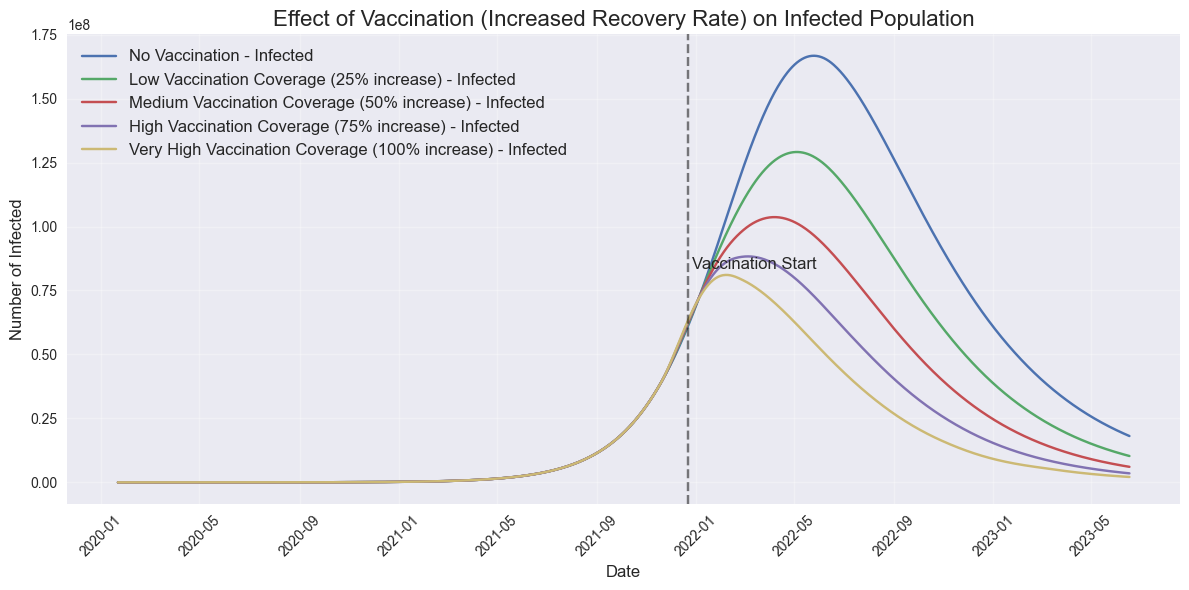


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         129120421.546912      834   
Medium Vaccination Coverage (50% increase)      103668374.925369      806   
High Vaccination Coverage (75% increase)         88309540.053003      773   
Very High Vaccination Coverage (100% increase)   81075384.834717      747   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-05-05 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-04-07 00:00:00   
High Vaccination Coverage (75% increase)        2022-03-05 00:00:00   
Very High Vaccination Coverage (100% increase)  2022-02-07 00:00:00   

                                                Total Infections  \
No Vacci

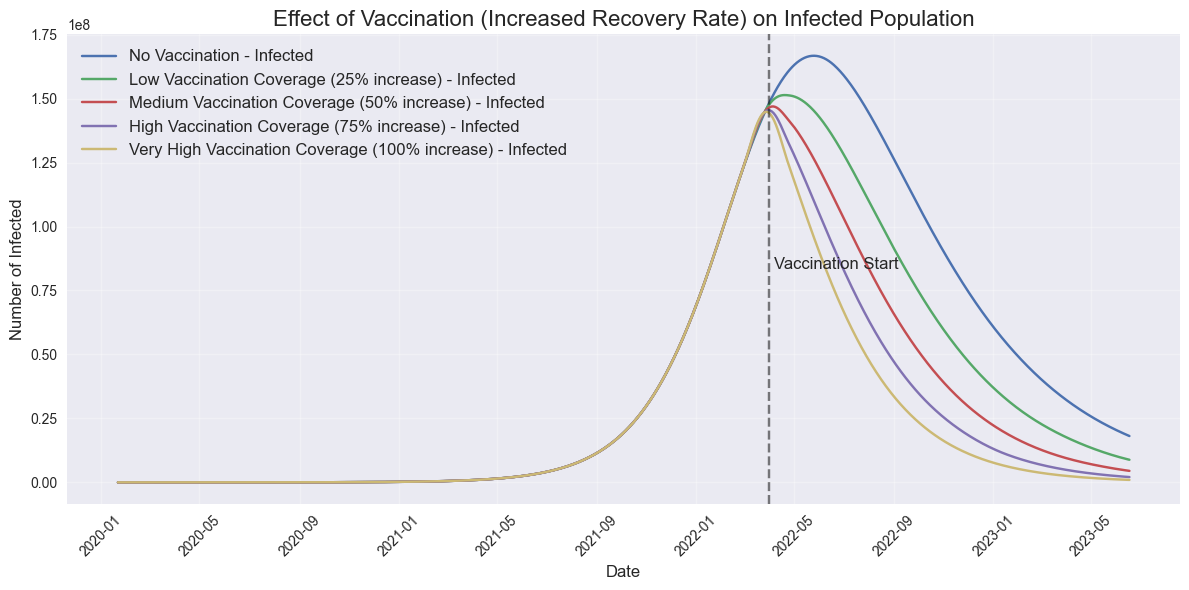


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         151373607.594163      819   
Medium Vaccination Coverage (50% increase)      146930241.998111      804   
High Vaccination Coverage (75% increase)        145439064.009021      799   
Very High Vaccination Coverage (100% increase)  144824307.348673      796   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-04-20 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-04-05 00:00:00   
High Vaccination Coverage (75% increase)        2022-03-31 00:00:00   
Very High Vaccination Coverage (100% increase)  2022-03-28 00:00:00   

                                                Total Infections  \
No Vacci

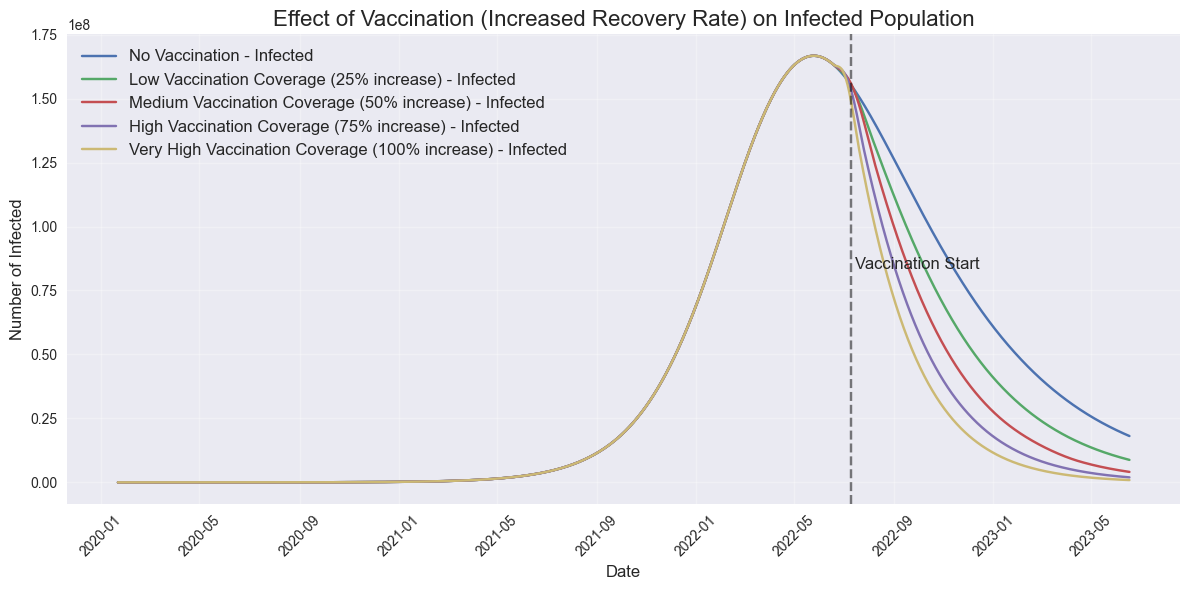


Vaccination Strategy Comparison:
                                                 Peak Infections Peak Day  \
No Vaccination                                  166739023.452661      854   
Low Vaccination Coverage (25% increase)         166739023.452661      854   
Medium Vaccination Coverage (50% increase)      166739023.452661      854   
High Vaccination Coverage (75% increase)        166739023.452661      854   
Very High Vaccination Coverage (100% increase)  166739023.452661      854   

                                                          Peak Date  \
No Vaccination                                  2022-05-25 00:00:00   
Low Vaccination Coverage (25% increase)         2022-05-25 00:00:00   
Medium Vaccination Coverage (50% increase)      2022-05-25 00:00:00   
High Vaccination Coverage (75% increase)        2022-05-25 00:00:00   
Very High Vaccination Coverage (100% increase)  2022-05-25 00:00:00   

                                                Total Infections  \
No Vacci

In [70]:
#simulatlation for different time before the vaccination starts
for intervention_day in range(100, 1000, 100):
  vaccination_results, vaccination_comparison = perform_vaccination_intervention(
    fitted_params,
    population,
    [predictions['S'][0], predictions['I'][0], predictions['R'][0]],
    predictions['dates'],
    intervention_day
)

**Sensitivity Analysis Results:** Strong early lockdowns (Beta) appear to be the most impactful immediate intervention for rapidly halting transmission as it affects other parameters and the output very much in comparison to other parameters

# **Understanding COVID-19 Intervention Strategies and Their Impact**
The analysis and the graphs above present a fascinating comparison of different COVID-19 intervention strategies and their effects on the spread of the virus throughout a population. Here is an explanation of what these results show and how they demonstrate the importance of both timing and intensity of public health measures.

## Overview of the SIR Model Implementation

This work has effectively used the SIR (Susceptible-Infected-Recovered) model to simulate disease spread and evaluate two primary intervention strategies:
1.	**Lockdown Interventions** : Modeled by reducing the beta parameter (transmission rate) to simulate decreased contact between individuals
2.	**Vaccination Interventions** : Modeled by increasing the gamma parameter (recovery rate) to simulate faster movement from infected to recovered states

Each intervention was evaluated along two key dimensions:

1. **Intervention Intensity**: Varying levels of lockdown restrictions or vaccination coverage
2. **Intervention Timing**: Early versus delayed implementation of interventions


# Intervention Strategy Analysis
The data compares four different public health approaches:

**No Intervention:** Allowing the virus to spread naturally without restrictions

**Mild Intervention:** Implementing measures that reduce transmission by 25%

**Moderate Intervention:** Implementing measures that reduce transmission by 50%

**Strong Intervention**: Implementing measures that reduce transmission by 75%

# What the Simulation Shows

Through epidemiological modeling (specifically SIR - Susceptible, Infected, Recovered), we can simulate how COVID-19 would spread under each scenario. The model allows us to examine both the timing of interventions (early vs. late implementation) and their effectiveness.

**The Graph Visualization**

The graphs in conjunction clearly illustrates how different intervention strategies affect the number of infected people over time:

No Intervention (blue line): Shows a sharp, high peak reaching approximately 1.7×10⁸ infected individuals at its maximum, occurring around November 2021

Mild Intervention (green line): Delays and lowers the peak to about 7×10⁷ infections, peaking in August 2022

Moderate Intervention (red line): Drastically flattens the curve with a much smaller peak of about 2.1×10⁶ infections in May 2023

Strong Intervention (purple line): Almost completely suppresses the outbreak with a minimal peak of only about 4,500 infections in May 2020

The vertical dotted line labeled "Intervention Start" marks when the public health measures were implemented in the simulation. This allows us to visualize how early implementation affects outcomes.

# Key Insights from the Data

**Peak Infections:** The maximum number of simultaneously infected people varies dramatically, from over 104 million with no intervention to just 4,560 with strong intervention.

**Peak Timing:** More stringent interventions not only reduce the height of the infection peak but also affect when it occurs. No intervention leads to an earlier peak (Day 667), while mild and moderate interventions delay the peak (Days 949 and 1202 respectively). Strong intervention brings the peak forward to Day 108, suggesting early containment.

**Total Infections:** Over the entire course of the pandemic:

No intervention: 311 million infections

Mild intervention: 248 million infections

Moderate intervention: 3.8 million infections

Strong intervention: Only 20,921 infections


**Percentage Infected:** Perhaps most striking is the percentage of the population ultimately infected:

No intervention: 94.1%

Mild intervention: 74.9%

Moderate intervention: Just 1.2%

Strong intervention: A mere 0.006%



# Early vs Late Intervention
The simulation demonstrates that we can model both early and late implementation of lockdowns and Vaccination. What becomes apparent is that:

Early intervention drastically reduces both peak infections and total infections. When measures are implemented before widespread community transmission, even moderate restrictions can significantly contain the outbreak.
Late intervention still helps "flatten the curve" but cannot prevent a substantial portion of the population from becoming infected. The virus gains too much momentum, making it difficult to bring under control.The simulations show that waiting until day 500-1000 to implement interventions results in the epidemic already being well underway, greatly diminishing effectiveness

# Real-World Implications
This modeling helps explain why countries that implemented strong measures early in the pandemic (like New Zealand, South Korea, and Taiwan) experienced dramatically different outcomes than those that delayed action or implemented milder measures.
The graph visually demonstrates the concept of "flattening the curve" that became well-known during the pandemic. By spreading infections over time, healthcare systems become less overwhelmed, potentially reducing mortality even if the total number of infections remains significant.

# Conclusion
The simulation powerfully illustrates that both the timing and strength of interventions matter enormously in pandemic management. While stronger interventions come with greater economic and social costs, they dramatically reduce the human health impact of the pandemic.
Through such modeling, public health officials can make more informed decisions about when and how to implement measures like social distancing, mask mandates, business closures, and travel restrictions based on their society's priorities and healthcare capacity.

Using both the Logistic Growth Model and the Susceptible-Infected-Recovered (SIR) model, we were able to capture various aspects of disease dynamics and develop actionable recommendations for public health decision-making.
The Logistic Growth Model offered a simple way to identify trends and make rough estimates of total cases. Although limited in its ability to fit sophisticated epidemic behaviors such as multiple waves or varying transmission dynamics, it gave a good starting point for modeling simple growth patterns. In contrast, the SIR model provided us with a more mechanistic and quantitative description of disease transmission by modeling transition among individuals between states of susceptibility, infection, and recovery via differential equations. We were able to manipulate key parameters such as the transmission rate (β) and the recovery rate (γ) to simulate the effect of different interventions and determine their timing and effectiveness.
Our simulations of interventions revealed several findings. Lockdowns were effective for short-term spread reduction, especially if introduced early in the epidemic. The advantages declined when late and prolonged lockdowns were worrying in terms of sustainability and compliance by the public. Vaccination interventions, on the other hand, had long-term impacts by reducing the number of susceptible individuals permanently and hence flattening the epidemic curve. Most importantly, a combination of timely lockdowns followed by fast rollout of vaccinations generated the best outcomes, highlighting the benefit of adaptive and multi-layered public health interventions.

Policy-wise, our findings re-emphasize the urgent need to respond early during an outbreak. Even a delay of 100 days in deploying interventions can generate very much poorer outcomes. In addition, the efficacy of such interventions depends not merely on their structure but also on public compliance, implementation fidelity, and availability of resources such as vaccines and health infrastructure. Investments in preparedness, such as stockpiling, building the capacity of health systems, and regular simulation exercises, can induce responsiveness for future outbreaks.
We also acknowledged certain limitations of our modeling exercise. Real-world pandemics are influenced by numerous factors outside the remit of the basic SIR model, such as heterogeneous contact patterns, reinfections, super-spreader events, and the seasonality of transmission rates. Our models employed constant parameters and homogeneous population mixing, which simplify the mathematics but do not reflect these real-world complexities. Future research should examine more advanced models incorporating age structures, spatial, network-based dissemination, and stochasticity to better forecast epidemic patterns.
In conclusion, our work demonstrates the necessity of epidemic modeling for evidence-based public health policy. While it is impossible for any model to predict the path of an epidemic accurately, mathematical models like the ones employed herein provide a platform upon which informed decisions, allocation of resources, and ultimately the saving of lives are made.




# Limitations of SIR and Logistic Growth Models in Epidemic Modeling

Both the SIR model and logistic growth model provide valuable insights for epidemic forecasting, but they have distinct limitations when confronting real-world complexities:

## SIR Model Limitations

1. **Homogeneous Mixing Assumption**: The SIR model assumes uniform contact rates across the population, ignoring geographic variations, social clustering, and demographic differences.

2. **Fixed Parameters**: β (transmission) and γ (recovery) rates are typically assumed constant throughout the epidemic, but in reality, these change with interventions, behavioral adaptations, and seasonal factors.

3. **No Age Structure**: The standard SIR model doesn't account for age-dependent susceptibility or contact patterns, which are critical in diseases like COVID-19 where risk varies by age.

4. **No Reinfections**: The model assumes permanent immunity after recovery, which doesn't hold for pathogens that mutate or cause waning immunity.

5. **No Incubation Period**: SIR doesn't model the delay between infection and infectiousness, which affects transmission dynamics.

6. **Super-Spreader Events**: The SIR model cannot capture heterogeneity in transmission where certain individuals or events cause disproportionate infections.

7. **Vaccination Implementation**: While we modified γ to simulate vaccination, in reality, vaccines primarily move people from S to R, bypassing I entirely.

## Logistic Growth Model Limitations

1. **Approach to explaining events**: Unlike SIR, the logistic model doesn't model underlying transmission mechanisms, just describes the curve shape.

2. **Fixed Carrying Capacity**: The logistic model assumes a predetermined final epidemic size, which is problematic when multiple waves occur.

3. **Limited Predictive Power**: It works best for fitting historical data rather than predicting future trajectories, especially when interventions change.

4. **No Intervention Modeling**: Unlike SIR, it's difficult to explicitly model how specific interventions affect parameters.

5. **Unable to Model Multiple Waves**: The logistic curve assumes a single sigmoid growth pattern, failing to capture recurring epidemic waves.


## Real-World Complexities Affecting Predictions

### For SIR Models:

- **Super-Spreader Events**: These cause sudden jumps in cases that appear as prediction errors in SIR models due to their deterministic nature.

- **Seasonal Effects**: Seasonal changes in transmission require time-dependent parameters, complicating standard SIR implementations.

- **Population Heterogeneity**: Different contact patterns and susceptibility in subpopulations require stratified models.

### For Logistic Growth:

- **Super-Spreader Events**: These create sudden jumps that disrupt the smooth S-curve, appearing as outliers.

- **Interventions**: Policy changes create inflection points that aren't captured in a simple logistic model.

- **Multiple Waves**: The assumed single peak of logistic growth fails when multiple waves occur.

Both models are valuable but serve different purposes: SIR provides a better understanding and intervention modeling capabilities, while logistic growth offers simpler curve-fitting with less data requirements. The best approach we thought involves using both models complementarily while acknowledging their limitations.